In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Code univariate regression/simple regression

### Pen & Paper Exercise

Given the linear model:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

And the following concrete training data:

$$
D_{train} = \{(0,1),(1,3),(2,6),(4,8)\}
$$

with each tuple $(x,y)$ denoting $x$ the feature and $y$ the target.

**Task:**

For $\theta_0 = 1$ and $\theta_1 = 2$ calculate:

1. The cost:

$$ J_D(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\theta(x^{(i)})-y^{(i)})^2} $$

2. The gradient $\nabla J$, i.e. the partial derivatives:

$$ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_0} $$

$$ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_1} $$


**Solution:**

Just put $D_{train} = \{(0,1),(1,3),(2,6),(4,8)\}$ into the equations, so we get:

1. 
For the cost:
$$
J_D(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\theta(x^{(i)})-y^{(i)})^2} = \frac{1}{2\cdot 4} (0 + 0 + 1^2 + (- 1)^2) = \frac{1}{4}
$$

2. 
For $ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_0} $ we have:
$$
\frac{\partial J (\theta_0, \theta_1)}{\partial \theta_0} = \ldots =  \frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^i - y^i) = \frac{1}{m} (0 + 0 + 1 + (- 1)) = 0
$$
 For $ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_1} $ we have:
$$
\frac{\partial J (\theta_0, \theta_1)}{\partial \theta_0} = \ldots = \frac{1}{m}\sum_{i=1}^{m}((\theta_0 + \theta_1 x^i - y^i) \cdot x^i) = \frac{1}{4} (0 \cdot 0 + 0 \cdot 1 + 1 \cdot 2 + (- 1) \cdot 4) = \frac{1}{2}
$$

### Create a Data Set
First of all, you have to generate a data set $\mathcal D_{train}$. $\mathcal D_{train}$ consists of tuples $(x^{(i)},y^{(i)})$. Let $x$ and $y$ be two numpy 1d-arrays of equal-length $m$:

$$
{\vec x} = \left(x^{(1)},x^{(2)}, \ldots, x^{(m)}\right)^T \\
{\vec y} = \left(y^{(1)},y^{(2)}, \ldots, y^{(m)}\right)^T
$$

The $x$ values should be drawn from a **uniform distribution** . Add some noise $\delta$ to the corresponding $y$ values, which should be drawn from a **normal distribution**.

$$
    y^{(i)} = a + b * x^{(i)} + \delta^{(i)}
$$

We will use an numpy 1d-array for the data which is equivalent to vectors: 

\begin{equation}
    \vec y = a * \vec 1 + b * \vec x + \vec \delta
\end{equation}

, with:
* $x \sim Uniform([x_{min}, x_{max}])$
* $\delta \sim Normal(\mu=0.0, \sigma=1.0)$

An example data set could look like this plot (random seed 42 used): 

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/voigt/images/Simple-Linear-Regression_Data_Set.png" width="512" alt="internet connection needed">

**Hint:**
- To generate the vector for $x$ use the function `np.random.uniform`.
- To generate a vector of the noise use `np.random.randn`.

In [5]:
np.random.seed(42)

def linear_random_data(sample_size, a, b, x_min, x_max, noise_factor):
    '''creates a random data set based on a lienar function in a given interval
    
    Args:
        sample_size: number of data points
        a: coefficent of x^0
        b: coefficent of x^1
        x_min: lower bound value range
        x_max: upper bound value range
        noise_factor: strength of nosie added to y 
    
    Returns:
        x: array of x values | len(x)==len(y)
        y: array of y values corresponding to x | len(x)==len(y)
    '''
    x = np.random.uniform(x_min, x_max, sample_size)
    y = a + b * x + np.random.randn(sample_size) * noise_factor
    return x, y

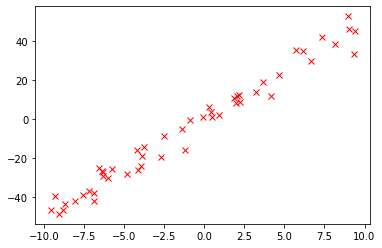

In [6]:
x, y = linear_random_data(sample_size=50, a=0., b=5., x_min=-10, x_max=10, noise_factor=5)
plt.plot(x,y, "rx")

### Linear Hypothesis
A short recap, a hypothesis $h_\theta(x)$ is a certain function that we believe is similar to a target function that we like to model. A hypothesis $h_\theta(x)$ is a function of $x$ with fixed parameters $\theta$. The simplest kind of hypothesis is based on a linear equation with two parameters: 

\begin{equation}
    h_\theta(x) = \theta_{0} + \theta_{1} * x 
\end{equation}

Implement hypothesis $h_\theta(x)$ in the method `linear_hypothesis` and return it as a function. 

In [7]:
def linear_hypothesis(theta_0, theta_1):
    ''' Combines given arguments in a linear equation and returns it as a function
    
    Args:
        theta_0: first coefficient
        theta_1: second coefficient
        
    Returns:
        lambda that models a linear function based on theta_0, theta_1 and x
    '''
    return lambda x: theta_0 + theta_1 * x

### Cost Function
A cost function $J$ depends on the given training data $D$ and hypothesis $h_\theta(x)$. In the context of the simple linear regression, the cost function measures how wrong a model is regarding its ability to estimate the relationship between $x$ and $y$ for specific $\theta$ values. Later we will treat this as an optimization problem and try to minimize the cost function $J_D(\theta)$ to find optimal $\theta$ values for our hypothesis $h_\theta(x)$. The cost function we use in this exercise is the [Mean-Squared-Error](https://en.wikipedia.org/wiki/Mean_squared_error) cost function:

\begin{equation}
    J_D(\theta)=\frac{1}{2m}\sum_{i=1}^{m}{\left(h_\theta(x^{(i)}-y^{(i)})\right)^2}
\end{equation}

Implement the cost function $J_D(\theta)$ in the method `mse_cost_function`. The method should return a function that takes the values of $\theta_0$ and $\theta_1$ as an argument.

Sidenote, the terms loss function or error function are often used interchangeably in the field of Machine Learning.

In [9]:
def mse_cost_function(x, y):
    ''' Implements MSE cost function as a function J(theta_0, theta_1) on given tranings data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta_0, theta_1) that models the cost function
    '''
    assert(len(x) == len(y))
    m = len(x)
    return lambda theta_0, theta_1: 1./(2. * float(m)) * np.sum((linear_hypothesis(theta_0, theta_1)(x) - y )**2)

In [10]:
j =  mse_cost_function(x, y)
print(j(2.1, 2.9))
print(j(2.3, 4.9))

88.25403518579944
13.25543063455946


### Visualisation of Hypotheses

Now we want to visualize the data set together with the hypothesis and explore the effects of adjusting the parameters. In your plot,
* show your data set as a scatter plot
* show a hypothesis h(x) as a line plot
* calculate and present the MSE cost (a print statement will do as well)


In [12]:
def plot_data_with_hypothesis(x, y, theta0, theta1):
    ''' Plots the data (x, y) together with a hypothesis given theta0 and theta1.    
    '''
    # parameters (true values are 0,5)
    t0,t1 = theta0, theta1

    # plot the data points
    plt.plot(x,y,'rx',label='data set')

    # plot the hypothesis
    x_ = np.arange(-10,10)
    y_ = t0 + t1 * x_
    plt.plot(x_,y_, 'b-', label='hypothesis')

    # cost
    cost = mse_cost_function(x,y)(t0,t1)
    plt.text(0,-40,'$\\theta_0$ : {} \n$\\theta_1$ : {} \nCost : {}'.format(t0,t1,cost))
    plt.legend()
    plt.show()

    # * t0 moves the hypothesis along y-axis/sets y-offset
    # * t1 changes the gradient of the hypothesis
    # * when t0 and t1 are close to the true model, the line is close to the
    # data points and the cost is lower

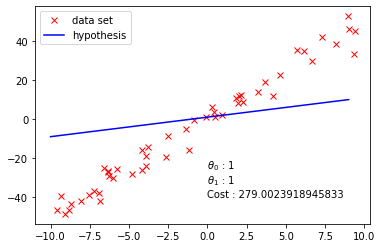

In [13]:
t0 = 1 ### try different values
t1 = 1 ### try different values

plot_data_with_hypothesis(x, y, theta0=t0, theta1=t1)

### Cost Function Visualization

After implementing a cost function, it is probably a good idea to visualize it to get from an abstract understanding to a more concrete representation. Use `matplotlib` and plot the cost function in two different ways. Create a [contour plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) that depicts a three-dimensional surface on a two-dimensional graph and plot the [surface](https://matplotlib.org/tutorials/toolkits/mplot3d.html?highlight=3d%20surface#mpl_toolkits.mplot3d.Axes3D.plot_surface) itself.

In [14]:
def create_cost_plt_grid(cost, interval, num_samples, theta0_offset=0., theta1_offset=0.):
    ''' 
        Creates mesh points for a 3D plot based on a given interval and a cost function.
    The function creates a numpy meshgrid for plotting a 3D-plot of the cost function.
    Additionally, for the mesh grid points cost values are calulated and returned.
    
    Args:
        cost: a function that is used to calculate costs. The function "cost" was typically e.g. 
              created by calling "cost = mse_cost_function(x, y)". So, the data x,y and the model 
              are used internally in cost. The arguments of the function cost are 
              theta_0 und theta_1, i.e. cost(theta_0, theta_0).
        interval: a scalar that defines the range [-interval, interval] of the mesh grid
        num_mesh: the total number of points in the mesh grid is num_mesh * num_mesh (equaly distributed) 
        theta0_offset: shifts the plotted interval for theta0 by a scalar
        theta1_offset: shifts the plotted interval for theta1 by a scalar
        
    Returns:
        T0: a matrix representing a meshgrid for the values of the first plot dimesion (Theta 0) 
        T1: a matrix representing a meshgrid for the values of the second plot dimesion (Theta 1)
        C: a matrix respresenting cost values (third plot dimension)        
    '''
    # initilize grid by given arguments and create a meshgrid
    t0 = np.linspace(-interval+theta0_offset, interval+theta0_offset, num=num_samples)
    t1 = np.linspace(-interval+theta1_offset, interval+theta1_offset, num=num_samples)
    T0, T1 = np.meshgrid(t0, t1) 
    
    # initilize cost matrix and cost function
    C = np.zeros([len(t0),len(t1)])
    #cost = cost_func(x, y)
    
    # calculate cost for each pair of the grid 
    for i, t_0 in enumerate(t0):
        for j, t_1 in enumerate(t1):
            C[j][i] = cost(t_0, t_1)
            
    return T0, T1, C

def create_cost_plt(T0, T1, Costs):
    ''' Creates a counter and a surface plot based on given data
    
    Args:
        T0: a matrix representing a meshgrid for X values (Theta 0) 
        T1: a matrix representing a meshgrid for Y values (Theta 1)
        C: a matrix respresenting cost values 
    '''
    # contour plot
    fig = plt.figure(figsize=(13,6))
    fig.suptitle('Visualization of MSE Cost Function')
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(T0, T1, C)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')

    # surface plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(T0, T1, C, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
    ax.set_xlabel('Theta 0', labelpad=9)
    ax.set_ylabel('Theta 1', labelpad=9)
    ax.set_zlabel('Costs', labelpad=9)
    fig.colorbar(surf, shrink=0.5)

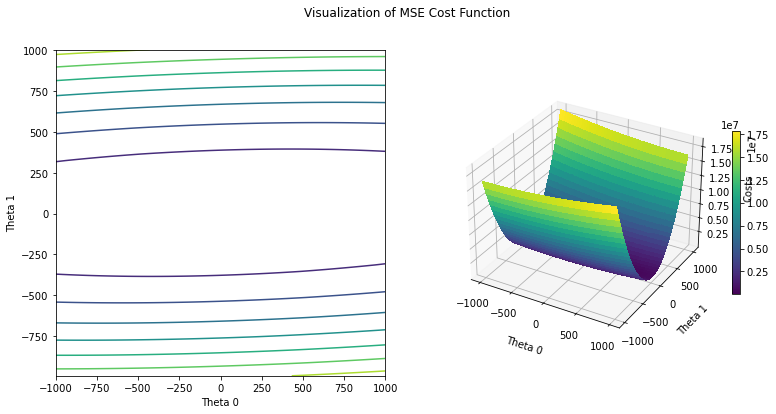

In [15]:
# create some data and plot it
T0, T1, C = create_cost_plt_grid(j, 1000, 51, theta1_offset=5.)
create_cost_plt(T0, T1, C)

###  Gradient Descent

A short recap, the gradient descent algorithm is a first-order iterative optimization for finding a minimum of a function. From the current position in a (cost) function, the algorithm steps proportional to the negative of the gradient and repeats this until it reaches a local or global minimum and determines. Stepping proportional means that it does not go entirely in the direction of the negative gradient, but scaled by a fixed value $\alpha$ also called the learning rate. Implementing the following formalized update rule is the core of the optimization process:

\begin{equation}
    \theta_{j}^{new} \leftarrow \theta_{j}^{new} - \alpha * \frac{\partial}{\partial\theta_{j}} J(\theta^{old})
\end{equation}

$\frac{\partial}{\partial\theta_{j_{old}}} J(\theta_{old})$ is the partial derivative (gradient) of the cost function with respect to the j-th parameter.

Partial derivative for $\theta_0$:
$$
\frac{\partial}{\partial \theta_0} J(\Theta)
= \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 \cdot x^{(i)} - y^{(i)})
$$

Partial derivative for $\theta_1$:
$$
\frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 \cdot x^{(i)} - y^{(i)}) \cdot x^{(i)}
$$

In [16]:
def update_theta(x, y, theta_0, theta_1, learning_rate):
    ''' Updates learnable parameters theta_0 and theta_1 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        x: array of x values
        y: array of y values corresponding to x
        theta_0: current theta_0 value
        theta_1: current theta_1 value
        learning_rate: value to scale the negative gradient 
        
    Returns:
        t0: Updated theta_0
        t1: Updated theta_1
    '''
    m = len(x)
    # calculate gradients
    dt0 = 1./float(m) * (theta_0 + theta_1 * x - y).sum()  
    dt1 = 1./float(m) * ((theta_0 + theta_1 * x - y) * x ).sum() 
    # update theta values
    t0 = theta_0  - learning_rate * dt0
    t1 = theta_1  - learning_rate * dt1
    return t0, t1

Using the `update_theta` method, you can now implement the gradient descent algorithm. Iterate over the update rule to find a $\theta_0$ and a $\theta_1$ that minimize our cost function $J_D(\theta)$. This process is often called training of a machine learning model. During the training process create a history of all theta and cost values. You can use them later for evaluation. Implement a `verbose` argument that if true provides additional information during the process, e.g., final theta values after optimization or cost value at some iterations.

In [18]:
def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, verbose=False):
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        learning_rate: scalar, scales the negative gradient 
        verbose: boolean, print addition information 
        
    Returns:
        t0s: list of theta_0 values, one value for each iteration
        t1s: list of theta_1 values, one value for each iteration
        costs: list oft costs, one value for each iteration.
    '''
    # initilize histories
    cost_hist = np.zeros(iterations)
    t0_hist = np.zeros(iterations)
    t1_hist = np.zeros(iterations)

    # initialize first theta values 
    theta_0 = np.random.random()
    theta_1 = np.random.random()
    
    # get loss function based on given data
    cost = mse_cost_function(x, y)
    
    t0_hist[0] = theta_0
    t1_hist[0] = theta_1
    cost_hist[0] = cost(theta_0, theta_1)
    # optimize theta values
    for i in range(iterations):
        theta_0, theta_1 = update_theta(x, y, theta_0, theta_1, learning_rate)
        t0_hist[i] = theta_0
        t1_hist[i] = theta_1
        cost_hist[i] = cost(theta_0, theta_1)
    if verbose:    
        print('costs:', cost_hist[-1])
        print('theta_0:', t0_hist[-1])
        print('theta_1:', t1_hist[-1])
    return cost_hist, t0_hist, t1_hist

In [19]:
cost_hist, t0_hist, t1_hist = gradient_descent(x, y, iterations=250, learning_rate=0.0003, verbose=True)

costs: 12.57563390793298
theta_0: 0.7008718206639973
theta_1: 4.625621476382922


###  Model and Training Evaluation
Now visualize the training process by plotting the `cost_hist` as a curve. Also, create a plot that shows the decision boundary of your final hypothesis (model) inside your data.

In [20]:
def evaluation_plt(cost_hist, theta_0, theta_1, x, y):
    ''' Plots a cost curve and the decision boundary
    
    The Method plots a cost curve from a given training process (cost_hist). 
    It also plots the data set (x,y) and draws a linear decision boundary 
    with the parameters theta_0 and theta_1 into the plotted data set.
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar, model parameter for boundary
        theta_1: scalar, model parameter for boundary
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    plt.figure(1, figsize=(17,7))

    plt.subplot(121)
    plt.subplots_adjust(wspace = 0.2)
    plt.plot(np.linspace(0, len(cost_hist), len(cost_hist)), cost_hist)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Curve')

    x_ = np.arange(x.min() - 1., x.max() + 1., 0.1) 
    model = theta_0 + theta_1 * x_
    plt.subplot(122)
    plt.plot(x_, model, "b-")
    plt.plot(x, y, "rx")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

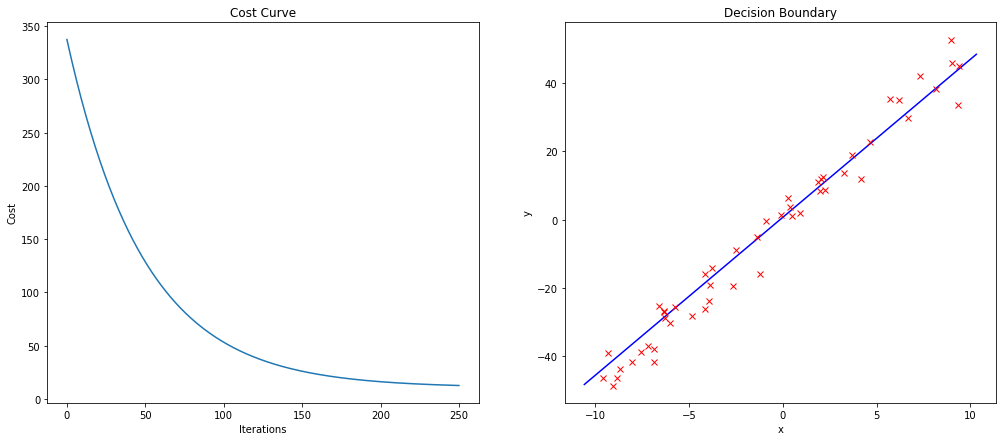

In [21]:
evaluation_plt(cost_hist, t0_hist[-1], t1_hist[-1], x, y)

### Optimize Hyperparameter
In machine learning, hyperparameters are parameters whose values are set before starting the training process of the model. The learning rate is a hyperparameter, and it is a crucial parameter in the context of optimization with first-order methods in supervised learning. It can easily happen that your model does not learn if you have chosen an unsuited learning rate. To find a suitable learning rate for your problem, you need to try different ones. Implement a function `optimize_learning_rate` that trains your model with different learning rates and plots the different cost histories.

In [22]:
def optimize_learning_rate(learning_rates, x, y):
    ''' Train a model with diffrent learning rates and plots the costs
    
    Args:
        learning_rates: vector, learning rates used to train a linear model
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''    
    plt.figure(figsize=(17,9))

    for lr in learning_rates:
        cost_hist, t0_hist, t1_hist = gradient_descent(x, y, iterations=250, learning_rate=lr)
        plt.plot(np.array(range(cost_hist.shape[0])), cost_hist, label='learning rate ' + str(lr))


    plt.axis('auto')
    plt.xlabel('Iterations')
    plt.ylabel('Costs')
    plt.title('Cost Curves')
    plt.legend(loc='best')
    plt.ylim(0,1000)

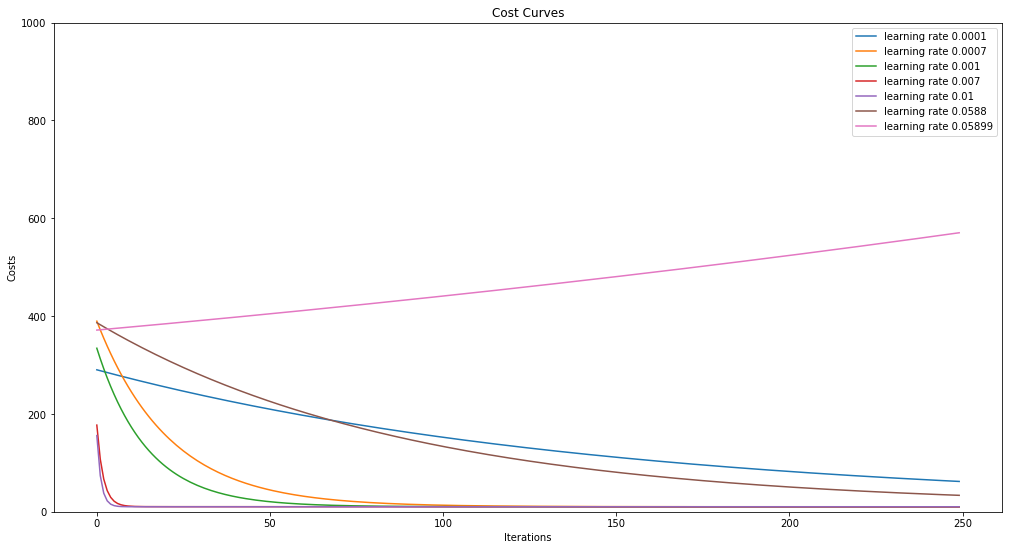

In [23]:
potential_lr = np.array([0.0001, 0.0007, 0.001, 0.007, .01, .0588, .05899])
optimize_learning_rate(potential_lr, x, y)

# Code multivariate regression/multivariate linear regression

### Create Features

First we will create some features. The features should be in a 2D numpy array, the rows separating the different feature vectors (training examples), the columns containing the features. Each feature should be **uniformly** distributed in a specifiable range.

**Task:**

Implement the function to generate a feature matrix (numpy array).

In [25]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    '''creates random feature vectors based on a lienar function in a given interval
    
    Args:
        sample_size: number feature vectors
        n_features: number of features for each vector
        x_min: lower bound value ranges
        x_max: upper bound value ranges
    
    Returns:
        x: 2D array containing feature vecotrs with shape (sample_size, n_features)
    '''
    
    return np.random.uniform(x_min, x_max, (sample_size, n_features))

In [26]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[10.45764219,  1.27761613],
       [ 6.42851091,  3.36660427],
       [ 4.95448122,  4.84480145],
       [10.6432493 ,  0.88480263],
       [ 6.22386081,  1.1548307 ],
       [ 4.2059847 , -0.29712179],
       [ 7.29086117,  2.26473463],
       [ 1.98904814,  1.03255555],
       [10.12852592,  0.8175904 ],
       [ 2.87650128,  2.19199018],
       [10.86367931,  0.83130399],
       [ 7.8852877 ,  3.68890788],
       [ 3.75755667,  3.50518992],
       [ 4.99393976,  2.97768207],
       [ 7.51853225,  2.44676076],
       [ 2.35775282,  4.09416373],
       [ 4.54741062,  0.52585181],
       [ 1.88736384,  2.74991119],
       [ 7.93686144, -0.40876694],
       [ 6.36488405,  0.74572676],
       [ 7.62914151,  0.45901536],
       [ 8.06390851,  1.6270444 ],
       [10.39893489,  0.25636519],
       [ 4.74013033,  0.12410437],
       [10.28458937,  4.32536644],
       [ 3.95044546,  3.12991225],
       [ 9.2636109 ,  2.55360446],
       [ 6.53168049,  0.8301876 ],
       [ 2.38447629,

### Linear Hypothesis


A short recap, a hypothesis $h_\theta({\bf x})$ is a certain function that we believe is similar to a target function that we like to model. A hypothesis $h_\theta({\bf x})$ is a function of ${\bf x}$ with fixed parameters $\Theta$. 

Here we have $n$ features ${\bf x} = \{x_1, \ldots, x_n \}$ and $n+1$ parameters $\Theta = \{\theta_0, \theta_1 \ldots, \theta_n \}$:

$$
h_\theta({\bf x}) = \theta_{0} + \theta_{1} x_1 + \ldots \theta_n x_n 
$$

adding an extra element to $\vec x$ for convenience, this could also be rewritten as:

$$
h_\theta({\bf x}) = \theta_{0} x_0 + \theta_{1} x_1 + \ldots \theta_n x_n 
$$

with $x_0 = 1$ for all feature vectors (training examples).

Or treating ${\bf x}$ and $\Theta$ as vectors:

$$
h(\vec x) = \vec x'^T \vec \theta
$$

with:

$$
\vec x = \begin{pmatrix} 
x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}^T
\text{   and   }
\vec x' = \begin{pmatrix} 
1 & x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}^T
$$

and

$$
\vec \theta = \begin{pmatrix} 
\theta_0 & \theta_1 & \ldots & \theta_n \\
\end{pmatrix}^T
$$

Or for the whole data set at once: The rows in $X$ separate the different feature vectors, the columns contain the features. 

$$
\vec h_\Theta(X) = X' \cdot \vec \theta
$$

the vector $\vec h(X) = \left( h(\vec x^{(1)}),h(\vec x^{(2)}), \dots, h(\vec x^{(m)}) )\right)^T$ contains all predictions for the data batch $X$.

with:

$$
\begin{align}
X &= \begin{pmatrix} 
x_1^{(1)} & \ldots & x_n^{(1)} \\
x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots \\
x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
&=
\begin{pmatrix} 
\vec x^{(1)T} \\
\vec x^{(2)T}  \\
\vdots  \\
\vec x^{(m)T}  \\
\end{pmatrix}
\end{align}
$$
respectively
$$
\begin{align}
X' = \begin{pmatrix} 
1 & x_1^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots &\vdots \\
1 & x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
&=
\begin{pmatrix} 
\vec x'^{(1)T} \\
\vec x'^{(2)T}  \\
\vdots  \\
\vec x'^{(m)T}  \\
\end{pmatrix}
\end{align}
$$

**Task:**

Implement hypothesis $\vec h_\Theta(X)$ in the method `linear_hypothesis` and return it as a function. Implement it the computationally efficient (**pythonic**) way by not using any loops and handling all data at once (use $X$ respectively $X'$).

**Hint:**

Of course you are free to implement as many helper functions as you like, e.g. for transforming $X$ to $X'$, though you do not have to. Up to you.

In [27]:
# Solution

def linear_hypothesis(thetas):
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    return lambda x: np.concatenate((np.ones((len(x[:,0]), 1)), x), axis=1).dot(thetas)

### Generate Target Values

**Task:**

Use your implemented `linear_hypothesis` inside the next function to generate some target values $Y$. Additionally add some Gaussian noise.

In [28]:
# Solution

def generate_targets(X, theta, sigma):
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        
    Returns:
        target values for X
    '''
    noise = np.random.randn(len(X)) * sigma
    h = linear_hypothesis(theta)
    y = h(X) + noise
    return y

In [29]:
theta = (2., 3., -4.)
sigma = 3.
y = generate_targets(X, theta, sigma)

### Plot The Data

**Task:**

Plot the data $\mathcal D = \{((x^{(1)}_1,x^{(1)}_2)^T,y^{(1)}), \ldots, ((x^{(n)}_1,x^{(n)}_2)^T,y^{(n)})\}$ in a 3D scatter plot. The plot should look like the following:

**Sidenote:**

The command `%matplotlib notebook` (instead of `%matplotlib inline`) creates an interactive (e.g. rotatable) plot.

In [33]:
# Solution

%matplotlib notebook

def plot_data_scatter(features, targets):
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features[:,0], features[:,1], targets, c='r')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')

<IPython.core.display.Javascript object>


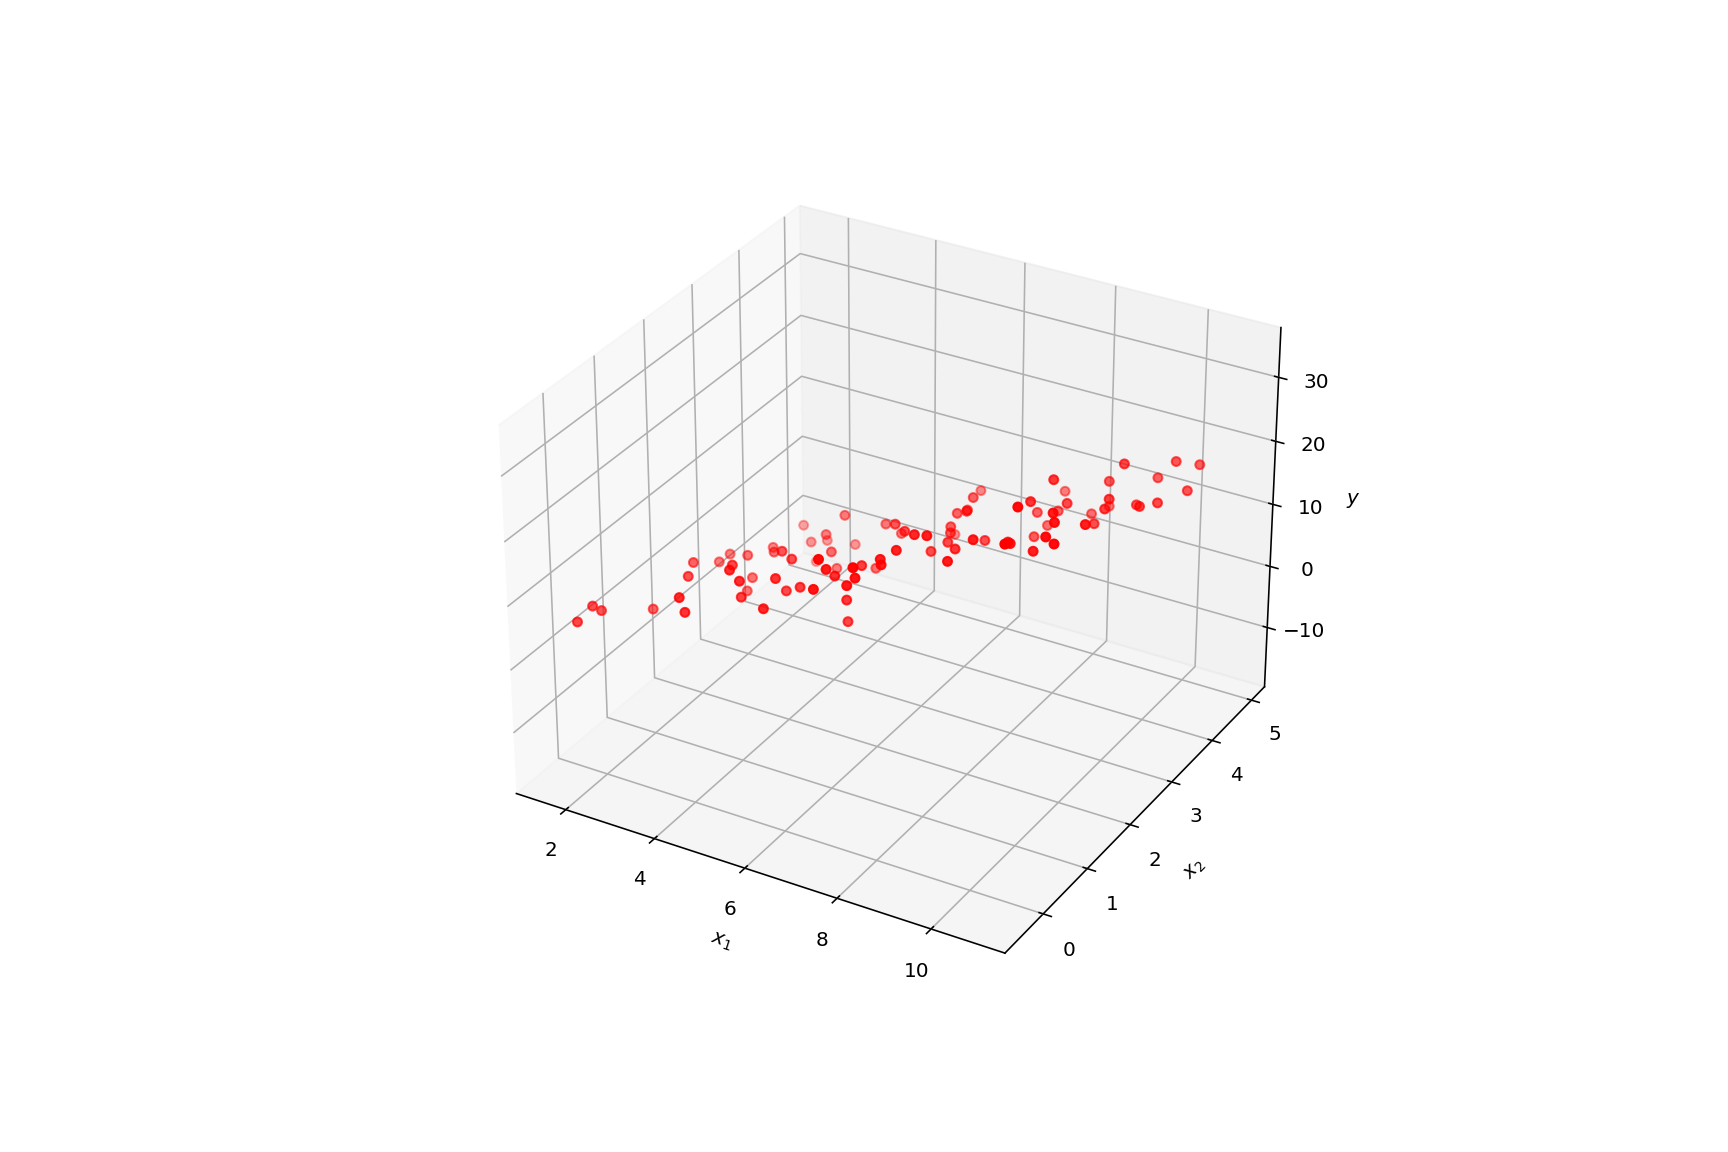

In [34]:
plot_data_scatter(X, y)

### Cost Function
A cost function $J$ depends on the given training data $D$ and hypothesis $h_\theta(\vec x)$. In the context of the linear regression, the cost function measures how "wrong" a model is regarding its ability to estimate the relationship between $\vec x$ and $y$ for specific $\Theta$ values. Later we will treat this as an optimization problem and try to minimize the cost function $J_{\mathcal D}(\Theta)$ to find optimal $\theta$ values for our hypothesis $h_\theta(\vec x)$. The cost function we use in this exercise is the [Mean-Squared-Error](https://en.wikipedia.org/wiki/Mean_squared_error) cost function:

\begin{equation}
    J_{\mathcal D}(\Theta)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\Theta(\vec x^{(i)})-y^{(i)})^2}
\end{equation}

Implement the cost function $J_D(\Theta)$ in the method `mse_cost_function`. The method should return a function that takes the values of $\Theta$ as an argument.

As a sidenote, the terms "loss function" or "error function" are often used interchangeably in the field of Machine Learning.

In [35]:
# Solution

def mse_cost_function(x, y):
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    assert(len(x) == len(y))
    m = len(x)
    return lambda theta: 1./(2. * float(m)) * np.sum((linear_hypothesis(theta)(x) - y )**2)

Review the cell in which you generate the target values and note the theta values, which were used for it (If you haven't edited the default values, it should be `[2, 3, -4]`)

**Optional:**

Try a few different values for theta to pass to the cost function - Which thetas result in a low error and which produce a great error?

In [36]:
J = mse_cost_function(X, y)
print(J(theta))

3.514898548947037


###  Gradient Descent

A short recap, the gradient descent algorithm is a first-order iterative optimization for finding a minimum of a function. From the current position in a (cost) function, the algorithm steps proportional to the negative of the gradient and repeats this until it reaches a local or global minimum and determines. Stepping proportional means that it does not go entirely in the direction of the negative gradient, but scaled by a fixed value $\alpha$ also called the learning rate. Implementing the following formalized update rule is the core of the optimization process:

\begin{equation}
    \theta_{j}^{new} \leftarrow \theta_{j}^{old} - \alpha * \frac{\partial}{\partial\theta_{j}} J(\vec \theta^{old})
\end{equation}

**Task:**

Implement the function to update all theta values.

In [38]:
# Solution

def update_theta(x, y, theta, learning_rate):
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        x: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient 
        
    Returns:
        theta: Updated theta vector
    '''
    m = len(x[:,0])
    # update rules
    x_ = np.concatenate((np.ones([m,1]), x), axis=1)
    theta = theta  - alpha / float(m) * (x_.T.dot(linear_hypothesis(theta)(x) - y) )
    return theta

Using the `update_theta` method, you can now implement the gradient descent algorithm. Iterate over the update rule to find the values for $\vec \theta$ that minimize our cost function $J_D(\vec \theta)$. This process is often called training of a machine learning model. 

**Task:**
- Implement the function for the gradient descent.
- Create a history of all theta and cost values and return them.

In [39]:
# Solution

def gradient_descent(learning_rate, theta, iterations, x, y):
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    history_cost = np.zeros(nb_iterations)
    history_theta = np.zeros([iterations, len(theta)])
    cost = mse_cost_function(x, y);
    for i in range(nb_iterations):
        history_theta[i] = theta
        history_cost[i] = cost(theta)
        theta = update_theta(x, y, theta, learning_rate)
    return history_cost, history_theta

### Training and Evaluation

**Task:**

Choose an appropriate learning rate, number of iterations and initial theta values and start the training

In [41]:
# Solution

alpha = 0.01
nb_iterations = 100
start_values_theta = [1.,-1.,.5]
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y)

Now that the training has finished we can visualize our results.

**Task:**

Plot the costs over the iterations. If you have used `fig = plt.figure()` and `ax = fig.add_subplot(111)` in the last plot, use it again here, else the plot will be added to the last plot instead of a new one.

In [43]:
# Solution

def plot_progress(costs):
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.array(range(len(costs))), costs)
    ax.set_xlabel('Iterationen')
    ax.set_ylabel('Kosten')
    ax.set_title('Fortschritt')

<IPython.core.display.Javascript object>


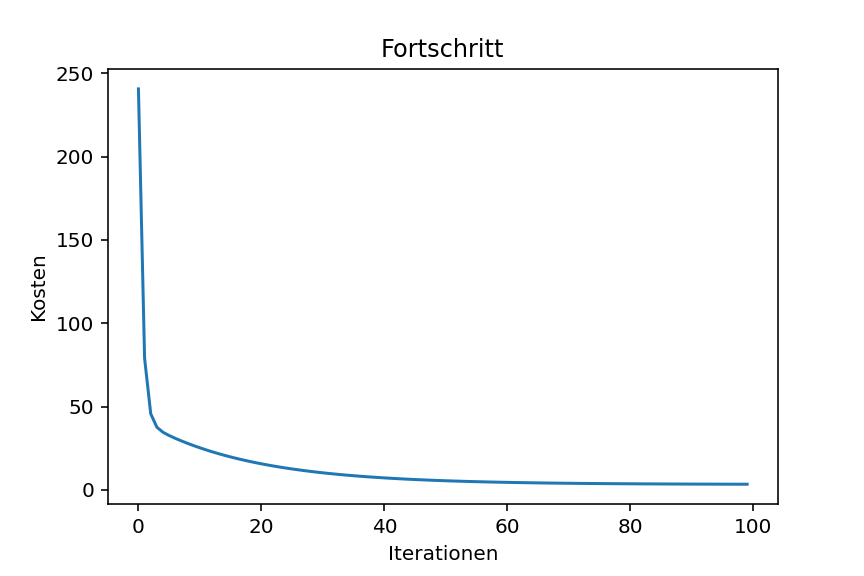

costs before the training:	  240.5939368002214
costs after the training:	  3.36521509641365


In [44]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

**Task:**

Finally plot the decision hyperplane (just a plain plane here though) together with the data in a 3D plot.

In [50]:
# Solution

def evaluation_plt(x, y, final_theta):
    g = 100
    x_1 = np.linspace(np.min(X[:,0]-1), np.max(X[:,0]+1), g)
    x_2 = np.linspace(np.min(X[:,1]-1), np.max(X[:,1]+1), g)
    X1, X2 = np.meshgrid(x_1, x_2)
    
    Y = final_theta[0] + final_theta[1] * X1 + final_theta[2] * X2
    print(Y.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X1, X2, Y, cmap=cm.jet, rstride=5, cstride=5, antialiased=True, shade=True, alpha=0.5, linewidth=0. )
    ax.scatter(x[:,0], x[:,1], y, c='r')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')

(100, 100)


<IPython.core.display.Javascript object>


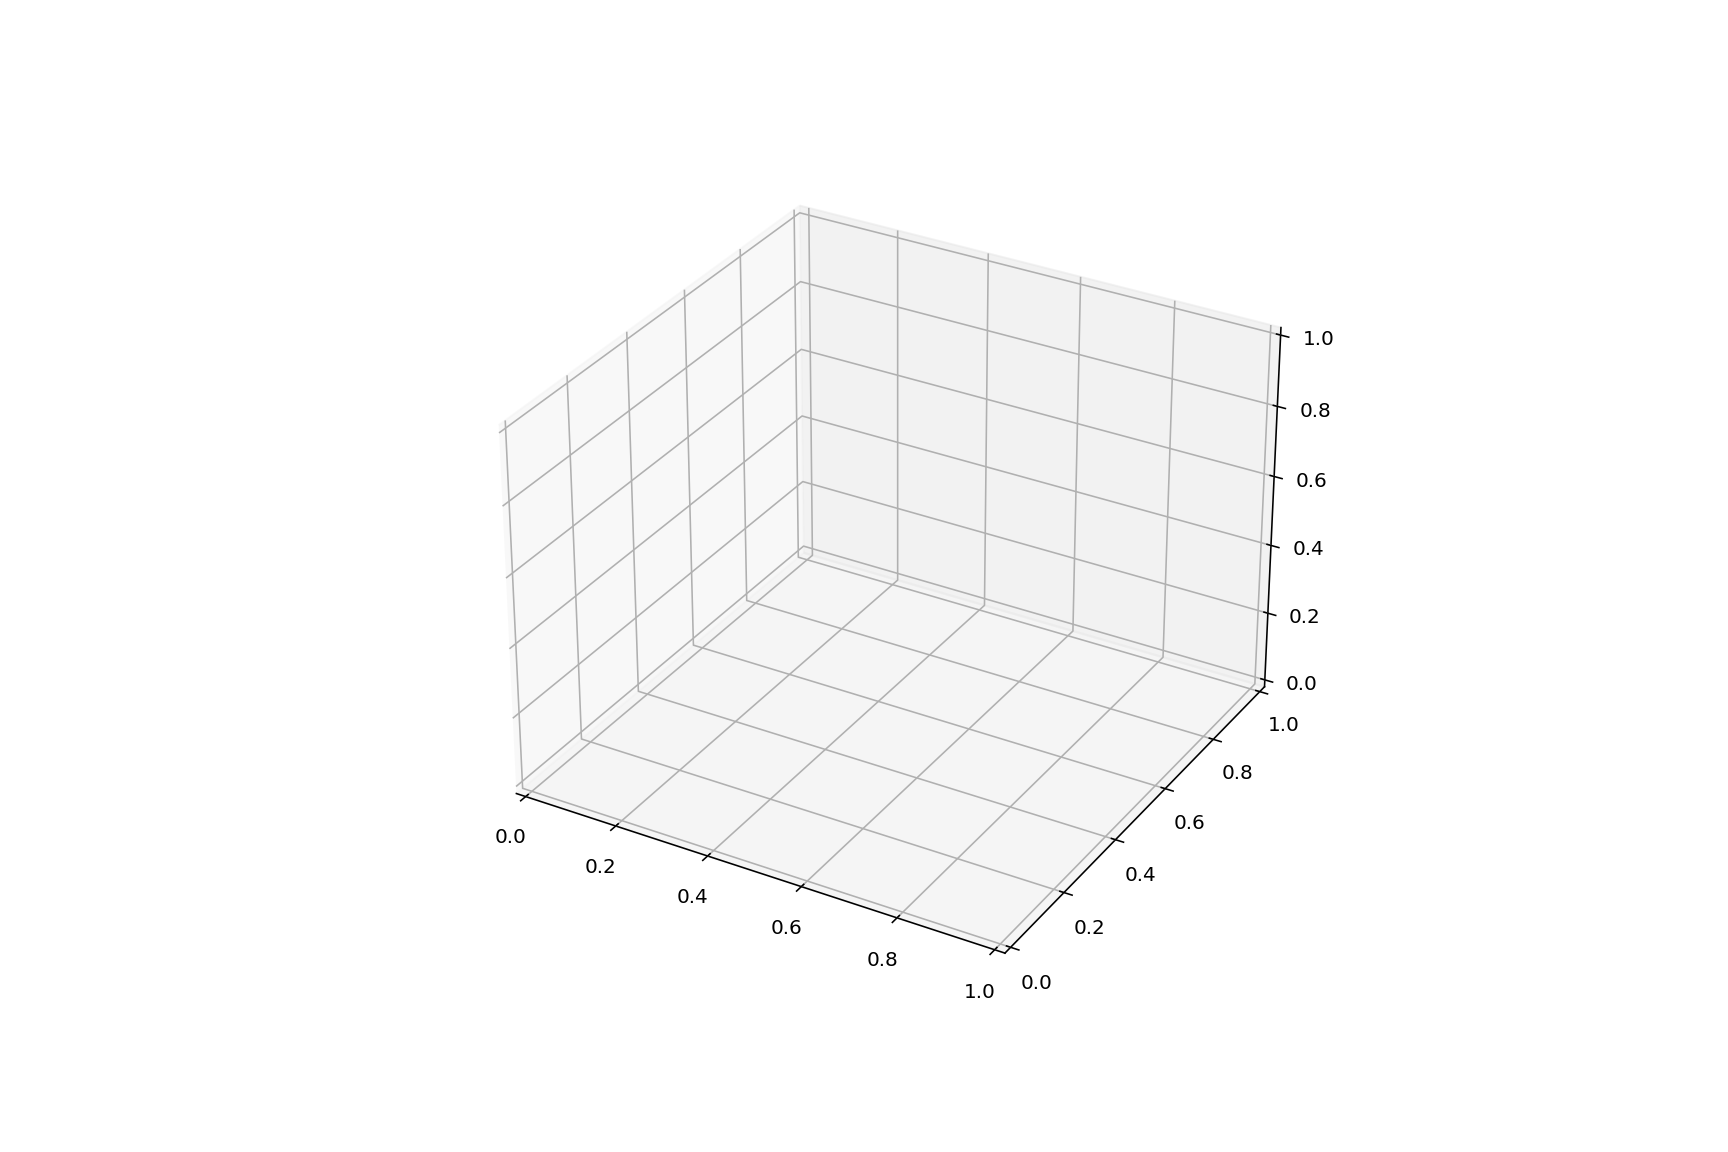

NameError: name 'cm' is not defined

In [51]:

evaluation_plt(X, y, history_theta[-1])
print("thetas before the training:\t", history_theta[0])
print("thetas after the training:\t", history_theta[-1])

### Feature Scaling

Now suppose the following features $X$:

In [52]:
X = np.array([[0.0001, 2000],
       [0.0002, 1800],
       [0.0003, 1600]], dtype=np.float32)

sample_size = len(X[:,0])
print(X)

[[1.0e-04 2.0e+03]
 [2.0e-04 1.8e+03]
 [3.0e-04 1.6e+03]]


**Task:**

This task can be done via **pen & paper** or by inserting some code below. Either way, you should be able to solve both tasks below on paper only using a calculator.

1. Apply feature scaling onto `X` using the *mean* and the *standard deviation*. What values do the scaled features have?
    * *Optional:*

        You can even execute the cell above and start running your notebook again from top (all **except** executing the cell to generate your features, which would overwrite these new features).

        When you start training you should notice that your costs do not decrease, maybe even increase, if you have not adjusted your learning rate (training might also throw an overflow warning).

**Task:**

2. After the training with scaled features your new $\\vec \theta'$ values will something like: $\vec \theta'=\left(-7197,  326, -326\right)^T$ (you can try training with but you do not have to). 

    Suppose $\vec \theta'=\left(-7197,  326, -326\right)^T$. What are the corresponding $\theta_j$ values for the unscaled data?

    * (If you did train your model with the scaled features, the resulting $\theta_j$ should really be $\vec \theta'=\left(-7197,  326, -326\right)^T$

In [54]:
# Solution for 1) + 2)

### Generate new targets for new features X

theta = (2., 3., -4.)
sigma = 3.
y = generate_targets(X, theta, sigma)

In [55]:
mu = X.mean(axis=0)
std = X.std(axis=0)
print(mu, std)

[2.0000001e-04 1.8000000e+03] [8.1649661e-05 1.6329932e+02]


In [56]:
X_scaled = (X - mu) / std
X_scaled

array([[-1.2247449e+00,  1.2247449e+00],
       [-1.7822383e-07,  0.0000000e+00],
       [ 1.2247449e+00, -1.2247449e+00]], dtype=float32)

In [57]:
### Calculate mean and standarddeviation and scale X

mu1 = X[:,0].mean()
std1 = np.sqrt(np.var(X[:,0]))
mu2 = X[:,1].mean()
std2 = np.sqrt(np.var(X[:,1]))

print("meanX1:\t", mu1, "\tstdX1:\t", std1)
print("meanX2:\t", mu2, "\tstdX2:\t", std2)

X[:,0] = (X[:,0] - mu1) / std1
X[:,1] = (X[:,1] - mu2) / std2
print("X scaled:\n", X)


meanX1:	 0.00020000001 	stdX1:	 8.164966e-05
meanX2:	 1800.0 	stdX2:	 163.29932
X scaled:
 [[-1.2247449e+00  1.2247449e+00]
 [-1.7822383e-07  0.0000000e+00]
 [ 1.2247449e+00 -1.2247449e+00]]


In [58]:
### Train with scaled X

alpha = 0.5
nb_iterations = 100

theta = (2., 3., -4.)
sigma = 3.
y = generate_targets(X, theta, sigma)

start_values_theta = [1.,-1.,.5]
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X_scaled, y)

print("thetas before the training:\t", history_theta[0])
print("thetas after the training:\t", history_theta[-1])
print("----------------------------")
print("costs before the training:\t", history_cost[0])
print("costs after the training:\t", history_cost[-1])

thetas before the training:	 [ 1.  -1.   0.5]
thetas after the training:	 [ 3.82569046  2.55739326 -3.0573871 ]
----------------------------
costs before the training:	 30.46005911941616
costs after the training:	 1.157744779644321


In [59]:
### Compute theta for unscaled data

theta_hat = np.array([-7197.,  326., -326.])
print("theta_hat:\t", theta_hat)

theta_hat_rescaled = np.array([0.,0.,0.])
theta_hat_rescaled[0] = theta_hat[0] - theta_hat[1]*mu1/std1 - theta_hat[2]*mu2/std2
theta_hat_rescaled[1] = theta_hat[1] / std1
theta_hat_rescaled[2] = theta_hat[2] / std2
print("theta_rescaled:\t", theta_hat_rescaled)

start_values_theta = theta_hat_rescaled

theta_hat:	 [-7197.   326.  -326.]
theta_rescaled:	 [-4.40213221e+03  3.99266812e+06 -1.99633414e+00]


In [60]:
### Rescale X to original

X = np.array([[0.0001, 2000],
       [0.0002, 1800],
       [0.0003, 1600]], dtype=np.float32)

In [61]:
### Test costs for original X and new rescaled theta

alpha = 0.000
nb_iterations = 10
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y)

print("costs with unscaled X and new theta:\t ", history_cost[-1])

costs with unscaled X and new theta:	  26134853.61311663


**Solution 3:**

With polynomila regression features like `1000` would easily skyrocket even more. And worse: `0.00001` would become too small very fast and lose precision. In the worst case values would overflow or become zero.

In [62]:
a = 60
p = 10
ppro10min = 60/10

# Logistic regression and regularization

### Pen & Paper Exercises

#### Task

Why is 

$$
\text{arg}\max_x f(x) = \text{arg}\min_x \left[ - \log f(x) \right] 
$$

#### Solution
 
The logarithm is a strictly monotonic function so we have 
$$
\text{arg}\max_x f(x) = \text{arg}\max_x \left[ \log f(x) \right] 
$$

with 
$$
 \text{arg}\min_x \left[ - \log f(x) \right] = \text{arg}\max_x \left[ \log f(x) \right] 
$$

we have the result

$$
\text{arg}\max_x f(x) = \text{arg}\min_x \left[ - \log f(x) \right] 
$$

#### Logistic model

In logistic regression, the prediction of a learned model $h_\Theta(\vec x)$
can be interpreted as the prediction that $\vec x$ belongs to the positive class $1$:

$$p(y=1\mid \vec x; \Theta) = h_\Theta(\vec x)$$

#### Task
What is the probability of the negative class $p(y=0\mid \vec x; \Theta)$ prediction (expressed with $h_\Theta(\vec x)$)?

#### Solution
$$p(y=0\mid \vec x; \Theta) = 1 - h_\Theta(\vec x)$$

#### Loss


The loss of an example $(\vec x^{(i)}, y^{(i)})$ with target value $y^{(i)}=1$ is
$$loss_{(\vec x^{(i)}, 1)} (\Theta) = - \log p(y=1\mid \vec x; \Theta)$$

The loss of an example $(\vec x^{(i)}, y^{(i)})$ with target value $y^{(i)}=0$ is
$$loss_{(\vec x^{(i)}, 0)} (\Theta) = - \log p(y=0\mid \vec x; \Theta)$$

So, $p(y=k\mid \vec x; \Theta)$ is maximized for the target class $k$ "by searching
in the $\Theta$-space".  

$p(y=k\mid \vec x; \Theta)$ is called *likelihood* of $\Theta$ (of one example $(\vec x, y)$)
if it is considered as a function of $\Theta$. 
Note that the likelihood is a function of $\Theta$.

$\mathcal L^{(i)}(\Theta) = \log p(y=y^{(i)}\mid \vec x^{(i)}; \Theta)$ is the log-likelihood
of $\Theta$ for an example $i$.

Why is $p(y=k\mid \vec x; \Theta)$ not a probability with respect to $\Theta$.
Which property of a probability does not hold?

#### Solution

$p(y=k\mid \vec x; \Theta)$ is a probability with respect to $y$. The property
$\sum_k p(y=k\mid \vec x; \Theta)=1$ holds.

This propery does not hold with respect to $\Theta$. 
The integral ($\Theta$ is continuous) $$\int_\Theta p(y\mid \vec x; \Theta) d\Theta$$
is not $1$ in general. Therefore, it's not a probability with respect to $\Theta$. $\Theta$ is on the right site of the conditioning-bar "$\mid$".

Therefore, it has another name if $p(y=k\mid \vec x; \Theta)$ is considered w.r.t. $\Theta$.
The technical term **likelihood** is used.

#### i.i.d. and log-likelihood for all data

Note that the training data in logistic regression should be 
**i.i.d.** (independent and identically distributed):

An simple example of an i.i.d. data set is the toin coss of a (marked) coin.
Assume that the probability of head (class $y=1$) is $0.4$, i.e. $p(y=1)=0.4$.     
The probability of getting two heads in two throws is $0.4 \cdot 0.4$:
- Each throw has the same distribution (here: $p(y=1)=0.4$. Each throw of the same coin is **identically distributed**
- The throws are **independent**. If we get a head on the first throw the probability of
getting a head on the second throw does not change.

So, the probability factorizes: $p(y^{(1)}=1, y^{(2)}=1)=p(y^{(1)}=1)p(y^{(2)}=1)$

For our classification problem:

$p(\mathcal D_y \mid \mathcal D_x; \Theta) = \prod_i p(y=y^{(i)}\mid \vec x^{(i)}; \Theta)$ 

with 
- $\mathcal D_x= \{x^{(1)}, x^{(2)}, \dots , x^{(m)}\}$
- $\mathcal D_y= \{y^{(1)}, y^{(2)}, \dots , y^{(m)}\}$
- $\mathcal D$ is the combination of $\mathcal D_x$ with $\mathcal D_y$:
$\mathcal D= \{ (\vec x^{(1)},y^{(1)}), (\vec x^{(2)},y^{(2)}), \dots , (\vec x^{(m)},y^{(m)})\}$. 

#### Task 
For the whole data set the log-likelihood $\mathcal L_\mathcal D(\Theta)$ of a parameter set $\Theta$ is 
$\log p(\mathcal D_y \mid \mathcal D_x; \Theta)$).     
Note: The (log-)likelihood $\mathcal L_\mathcal D(\Theta)$ is a function of the parameters $\Theta$.
Never say the (log-)likelihood of the data.

1. What is $\mathcal L_\mathcal D(\Theta) = \log p(\mathcal D_y \mid \mathcal D_x; \Theta)$ expressed by the $p(y=y^{(i)}\mid \vec x^{(i)}; \Theta)$?

2. What is the relation of the log-likelihood $\mathcal L^{(i)}(\Theta)$ (for the individual examples $(\vec x^{(i)}, y^{(i)})$) 
to the log-likelihood $\mathcal L_\mathcal D(\Theta)$ for the whole data set.

 
In logistic regression the cost function is the negative log-likelihood divided by the number of data examples $m$:

$$J (\Theta) = - \frac{\mathcal L_\mathcal D(\Theta)}{m}$$

2. The aveage log-liklihood 

2. What is the relation of the (log-)likelihood with the cost function for logistic-regression? 
3. Derive the cost function of logistic-regression by using your result of 2.

#### Solution

1. 
$$ \mathcal L_\mathcal D(\Theta) = \log p(\mathcal D_y \mid \mathcal D_x; \Theta) = \log \prod_i p(y=y^{(i)}\mid \vec x^{(i)}; \Theta) =\sum_i \log p(y=y^{(i)}\mid \vec x^{(i)}; \Theta)  $$

2. from 1. we have

$$ \mathcal L_{\mathcal D}(\Theta) = \sum_i \mathcal L^{(i)}(\Theta) $$

3.
So $J (\Theta)$ is the negative average of $\mathcal L^{(i)}(\Theta)$.


$$J (\Theta) = - \frac{\mathcal L_\mathcal D(\Theta)}{m}= - \frac{1}{m} \sum_i \mathcal L^{(i)}(\Theta)$$


So, we have with $p(y=1\mid \vec x^{(i)}; \Theta) = h_\Theta(\vec x)$ 
and $p(y=1\mid \vec x^{(i)}; \Theta) = 1- h_\Theta(\vec x)$:

$$
\begin{align}
J (\Theta) 
 & = - \frac{1}{m}  \sum_i \log p(y=y^{(i)}\mid \vec x^{(i)}; \Theta) \\
 &= - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \log h_\theta({\vec x}^{(i)})+
      (1 - y^{(i)}) \log \left( 1- h_\theta({\vec x}^{(i)})\right) \right]
\end{align}
$$

The trick of multiplying each term by $y^{(i)}$ resp. $(1 - y^{(i)})$ selects the correct term and
cancels out the incorrect one.

#### Derivative of the logistic function

The sigmoid activation function is defined as $\sigma (z) = \frac{1}{1+\exp(-z)}$ 

**Task:**

Show that:
$$
\frac{d \sigma(z)}{d z} = \sigma(z)(1-\sigma(z))
$$

**Solution:**

\begin{equation}
\begin{split}
\frac{d \sigma(z)}{d z} & = \frac{d }{d z}  \left(\frac{1}{1+\exp(-z)}\right) \\
 & \\
 & \text{Quotient rule}\\
 & \\
 & = \frac{(1)'(1+\exp(-z)) - (1)(1+\exp(-z))'}{(1+\exp(-z))^2} \\
 & \\
 & = \frac{0(1+\exp(-z)) - (1)(-\exp(-z))}{(1+\exp(-z))^2} \\
 & \\ 
 & = \frac{\exp(-z)}{(1+\exp(-z))^2} \\ 
 & \\
 & \text{adding +1-1 to the nominator}\\ 
 & \\ 
 & = \frac{ 1 + \exp(-z) - 1}{(1+\exp(-z))^2} \\ 
 & \\
 & = \frac{1 + \exp(-z) }{(1+\exp(-z))^2} - \frac{1}{(1+\exp(-z))^2} \\
 & \\
 & = \frac{1}{1+\exp(-z)} - \left( \frac{1}{1+\exp(-z)} \right)^2 \\
 & \\
 & = \sigma(z) - \sigma(z)^2 \\
 & \\
 & = \sigma(z) (1-\sigma(z))
\end{split}
\end{equation}

#### Task:

Now show that:
$$
\frac{\partial \sigma(z)}{\partial \theta_j} = \sigma(z)(1-\sigma(z)) \cdot x_j
$$


with 
- $z=\vec x'^T \vec \theta$

and
- $\vec \theta = (\theta_0, \theta_1, \dots, \theta_n)^T $
- $\vec x' = (x_0, x_1, \dots, x_n)^T $


Hint: Use the *chain rule of calculus*.

Solution:
    
    
Note that $z=\vec x'^T \vec \theta = \sum_{k=0}^{n} \theta_k x_k$
    
$$
\frac{\partial \sigma(\vec x'^T \vec \theta)}{\partial \theta_j} = 
\frac{\partial \sigma(z)}{\partial z} \frac{\partial z}{\partial \theta_j}=
\frac{\partial \sigma(z)}{\partial z} \frac{\partial(\sum_{k=0}^{n} \theta_k x_k)}{\partial \theta_j}= \sigma(z) (1-\sigma(z)) x_j
$$

**Task:**

Show from
$$
    \frac{\partial}{\partial \theta_j}  J(\theta)  =  
    \frac{\partial}{\partial \theta_j}  \left( - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \log h_\theta({\vec x}^{(i)})+
      (1 - y^{(i)}) \log \left( 1- h_\theta({\vec x}^{(i)})\right) \right] \right)
$$  
that
$$
\frac{\partial}{\partial \theta_j}  J(\theta)  =   \frac{1}{m}
     \sum_{i=1}^{m} \left( h_\theta({\vec x}^{(i)})- y^{(i)}\right) x_j^{(i)}
$$

with the hypothesis $h_\theta(\vec x^{(i)}) = \sigma(\vec x'^T \vec \theta)$
So, with our classification cost function (from the max-likelihood principle) the 
partial derivatives (components the gradient) has a simple form.

**Hint:**

1. Make use of your knowledge, that:

$$
\frac{\partial h_\theta(\vec x^{(i)})}{\partial \theta_j} = h_\theta(\vec x^{(i)})(1-h_\theta(\vec x^{(i)})) \cdot x_j
$$
2. and note that the chain rule for the derivative of the log is:

$$
\frac{\partial \log(f(a))}{\partial a} = \frac{\partial \log(f(a))}{\partial f} \frac{\partial f(a)}{\partial a} =
\frac{1}{f(a)} \frac{\partial f(a)}{\partial a}
$$

Solution (very, very explicitly - it's much simples as it looks like):

$$\begin{align}
    \frac{\partial}{\partial \theta_j}  J(\theta) &= 
    \frac{\partial}{\partial \theta_j}  \left( - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \log h_\theta({\vec x}^{(i)})+
      (1 - y^{(i)}) \log \left( 1- h_\theta({\vec x}^{(i)})\right) \right] \right) \\ &=
        - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \frac{\partial}{\partial \theta_j}  \log h_\theta({\vec x}^{(i)})+
      (1 - y^{(i)}) \frac{\partial}{\partial \theta_j}  \log \left( 1- h_\theta({\vec x}^{(i)})\right) \right]  \\&=  
 - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \frac{h_\theta({\vec x}^{(i)}) (1-h_\theta({\vec x}^{(i)})) } {h_\theta({\vec x}^{(i)})} x_j^{(i)} -
      (1 - y^{(i)}) \frac{h_\theta({\vec x}^{(i)}) (1-h_\theta({\vec x}^{(i)})) }{\left( 1- h_\theta({\vec x}^{(i)})\right)} x_j^{(i)} \right]\\
    &=    - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} {  (1-h_\theta({\vec x}^{(i)})) }   x_j^{(i)} -
      (1 - y^{(i)}) {h_\theta({\vec x}^{(i)}) } x_j^{(i)} \right]\\
    &=    - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} {  (1-h_\theta({\vec x}^{(i)})) }  -
      (1 - y^{(i)}) {h_\theta({\vec x}^{(i)} }) \right]x_j^{(i)}\\ 
    &=    - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} - y^{(i)} h_\theta({\vec x}^{(i)})   -
      ( h_\theta({\vec x}^{(i)}) - y^{(i)} h_\theta({\vec x}^{(i)}) ) \right]x_j^{(i)}\\
    &=    - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} - y^{(i)} h_\theta({\vec x}^{(i)})   
      - h_\theta({\vec x}^{(i)}) + y^{(i)} h_\theta({\vec x}^{(i)}) \right]x_j^{(i)}\\
    &=    - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)}    
      - h_\theta({\vec x}^{(i)})  \right]x_j^{(i)}\\
  &=  \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  h_\theta({\vec x}^{(i)}) - y^{(i)} \right]x_j^{(i)}
\end{align}
$$  

### Data Generation

First we will create some artificial data. For each class, we will generate the features with bivariate (2D) normal distribution;

In [3]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

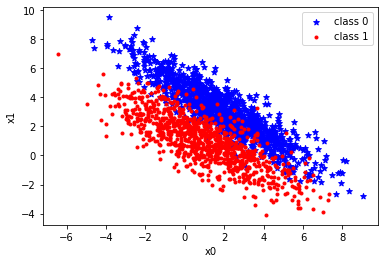

In [4]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1

### Logistic Function

For the logistic regression, we want the output of the hypothesis to be in the interval $]0, 1[$. This is done using the *logistic function* $\sigma(.)$. The logistic function is also called *sigmoid function* in machine learning:

**Task:**

Implement the _logistic function_ and plot it in the interval of $[-10,10]$.

Text(0, 0.5, 'logisticFunction(x)')

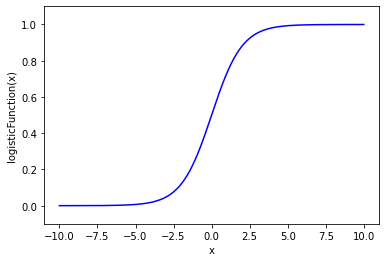

In [6]:
# Solution

def logistic_function(x):
    """ Returns f(x) with f beeing the logistic function.
    """
    return 1. / (1. + np.exp(-x))

### Insert code to plot the logistic function below
x = np.linspace(-10.,10.,1000)
plt.plot(x, logistic_function(x), 'b-')
plt.ylim(-.1,1.1)
plt.xlabel("x")
plt.ylabel("logisticFunction(x)")

### Logistic Hypothesis

The hypothesis in logistic regression is defined by:

$$
h_\Theta(\vec x) = \sigma(\vec x'^T \cdot \vec \theta)
$$

with:

$$
\vec x^T = \begin{pmatrix} 
x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}
\text{   and   }
\vec x'^T = \begin{pmatrix} 
x_0=1 & x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}
$$

or for the whole data set $X$ and $X'$

$$
X = \begin{pmatrix} 
x_1^{(1)} & \ldots & x_n^{(1)} \\
x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots \\
x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
\text{   and   }
X' = \begin{pmatrix} 
1 & x_1^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots &\vdots \\
1 & x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
$$


 - $n$ is the number of features
 - $m$ is the number of training data (examples)
 
 
**Task:**

Implement the logistic hypothesis using your implementation of the logistic function. `logistic_hypothesis` should return a function which accepts the training data $X$. Example usage:

`>> theta = np.array([1.1, 2.0, -.9])`

`>> h = logistic_hypothesis(theta) `

`>> print(h(X))`

**Note:** The training data was sampled with random noise, so the actual values of your h(X) may differ.

`array([0.03587382, 0.0299963 , 0.97389774, ...,`

**Hint:**

You may of course also implement a helper function for transforming $X$ into $X'$ and use it inside the `lamda` function of `logistic_hypothesis`.

In [7]:
def x_transform(x):
    return np.concatenate((np.ones((len(x),1)), x), axis=1)

def logistic_hypothesis(theta):
    ''' Combines given list argument in a logistic equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a logistc function based on thetas and x
    '''
    return lambda x: logistic_function(x_transform(x).dot(theta.T))

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
h = logistic_hypothesis(theta)
print(h(X))

[0.99985278 0.99999947 0.99999923 ... 0.99848546 0.99422007 0.87942166]


### Cross-entropy

The cross-entropy loss for a data point $({\vec x}^{(i)}, y^{(i)})$ is defined by:

\begin{equation}
    \text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\vec \theta) = -y^{(i)} \cdot log(h_{\Theta} ({\vec x}^{(i)})) - (1-y^{(i)}) \cdot log(1-h_\Theta({\vec x}^{(i)}))
\end{equation}


with 
- the target class $y^{(i)} \in \{ 0, 1\}$ of the $i$-th data point 
- the parameters $\Theta$ packed in the vector $\vec \theta$.
- $h_{\Theta}({\vec x}^{(i)})$ the predition for the feature vector of the $i$-th data point $\vec x^{(i)}$ with the parameters $\Theta$ (resp. $\vec \theta$)


**Task:**

Implement the cross-entropy cost. This is the sum of the losses of all data $(X, \vec y)$.

Your python function should return a function, which accepts the vector $\vec \theta$.
This reflects the fact that $\text{loss}(\vec \theta)$ is a function of the parameter (vector).

The returned function should return the cost for each feature vector $\vec x^{(i)}$ and target $y^{(i)}$. The length of the returned array of costs therefore has to be the same length as $m$ (number of data examples).    
Example usage:

`>> J = cross_entropy_loss(logistic_hypothesis, X, y)`

`>> print(J(theta))`

**Note:** The training data was sampled with random noise, so the actual values of your h(X) may differ.


`array([ 7.3,  9.5, ....`

In [8]:
# Solution

def cross_entropy_costs(h, X, y):
    ''' Implements cross-entropy as a function costs(theta) on given traning data 
    
    Args:
        h: the hypothesis as function
        X: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        
    Returns:
        lambda costs(theta) that models the cross-entropy for each x^i
    '''
    return lambda theta: -y * np.log(h(theta)(X)) - (1-y) * np.log(1. - h(theta)(X))

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
costs = cross_entropy_costs(logistic_hypothesis, X, y)
print(costs(theta))
print(costs(theta).min())
print(costs(theta).mean())

def squared_error_loss(h, X, y): 
    return lambda theta: 1./2. * (h(theta)(X) - y)**2

[1.47235221e-04 5.28762406e-07 7.68590797e-07 ... 6.49264502e+00
 5.15336445e+00 2.11545558e+00]
1.6292411865398924e-10
3.0406905615175526


### Loss Function

\begin{equation}
    J_{\mathcal D}(\vec \theta)=\frac{1}{m}\sum_{i=1}^{m}\left(\text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\Theta)\right)
\end{equation}

- with the training data $\mathcal D = \{ (\vec x^{(1)}, y^{(1)}), \dots,  (\vec x^{(m)}, y^{(m)}) \}$ 

**Task:**

Now implement the loss function $J$, which calculates the mean costs for the whole training data $X$. Your python function should return a function, which accepts the vector $\vec \theta$.

**Note:** You can ignore the parameter `lambda_reg` for now, it is a hyperparameter for regularization. In a later exercise, you may revisit your implementation and implement regularization if you wish.

In [9]:
# Solution

def mean_cross_entropy_costs(X, y, hypothesis, cost_func, lambda_reg):
    ''' Implements mean cross-entropy as a function J(theta) on given traning data 
    
    Args:
        X: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        hypothesis: the hypothesis as function
        cost_func: cost function
        
    Returns:
        lambda J(theta) that models the mean cross-entropy
    '''
    m = len(y)
    return lambda theta: (1./m) * (cost_func(hypothesis, X, y)(theta).sum() + lambda_reg * (theta[1:]**2).sum())

### Uncomment to test your implementation
#theta = np.array([1.,2.,3.])
#J = mean_cross_entropy_costs(X,y, logistic_hypothesis, cross_entropy_costs, 0.1)
#print(J(theta))

###  Gradient Descent

A short recap, the gradient descent algorithm is a first-order iterative optimization for finding a minimum of a function. From the current position in a (cost) function, the algorithm steps proportional to the negative of the gradient and repeats this until it reaches a local or global minimum and determines.
Stepping proportional means that it does not go entirely in the direction of the negative gradient, but scaled by a fixed value $\alpha$ also called the learning rate. Implementing the following formalized update rule is the core of the optimization process:

\begin{equation}
    \vec \theta_{new} \leftarrow \vec \theta_{{old}} - \alpha  \vec \nabla_\Theta J(\vec \theta_{old})
\end{equation}

**Task:**

Implement the function to update all $\theta$ values (in a vectorized way).

**Note:** You can ignore the parameter `lambda_reg` for now, it is a hyperparameter for regularization. In a later exercise, you may revisit your implementation and implement regularization.

In [ ]:
# Solution

def compute_new_theta(X, y, theta, learning_rate, hypothesis, lambda_reg):
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        hypothesis: the hypothesis as function

        
    Returns:
        theta: Updated theta_0
    '''
    
    m = len(X) 
    h = hypothesis(theta)(X)
    X_concat = np.concatenate((np.ones([len(X),1]), X), axis=1)
    #gradient = (1.0 / float(m)) * (X_concat.T.dot(h - y) # without regularization
    gradient = (1.0 / float(m)) * (X_concat.T.dot(h - y) + 2.* lambda_reg * np.concatenate(([0], theta[1:])))
    # update rule
    theta = theta - learning_rate * gradient
    return theta

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
theta = compute_new_theta(X, y, theta, .1, logistic_hypothesis, .1)
print(theta)

Using the `compute_new_theta` method, you can now implement the gradient descent algorithm. Iterate over the update rule to find the values for $\theta$ that minimize our cost function $J_D(\theta)$. This process is often called training of a machine learning model. 

**Task:**
- Implement the function for the gradient descent.
- Create a history of all theta and cost values and return them.

In [16]:
# Solution

def gradient_descent(X, y, theta, learning_rate, num_iters, lambda_reg=0.1):
    ''' Minimize theta values of a logistic model based on cross-entropy cost function
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        num_iters: number of iterations updating thetas
        lambda_reg: regularization strength
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    assert X[0].size + 1 == theta.size
    n = theta.size

    cost_history = np.zeros((num_iters+1))
    history_theta = np.zeros([num_iters, len(theta)])

    cost = mean_cross_entropy_costs(X, y, logistic_hypothesis, cross_entropy_costs, lambda_reg)

    for i in range(num_iters):
        cost_history[i] = cost(theta)
        theta = compute_new_theta(X, y, theta, learning_rate, logistic_hypothesis, lambda_reg)
        history_theta[i] = theta
    
    cost_history[num_iters] = cost(theta)  
    return cost_history, history_theta

### Training and Evaluation

**Task:**

Choose an appropriate learning rate, number of iterations and initial theta values and start the training

In [17]:
alpha = .1
#start_values_theta:
theta = np.array([1.,2.,3.])
num_iters = 500
lambda_reg = 0.0
history_cost, theta_hist = gradient_descent(X, y, theta, alpha, num_iters, lambda_reg)

Now that the training has finished we can visualize our results.

**Task:**

Plot the costs over the iterations. 

In [19]:
# Solution

def plot_progress(costs):
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.array(range(len(costs))), costs)
    ax.set_xlabel('Iterationen')
    ax.set_ylabel('Kosten')
    ax.set_title('Fortschritt')

costs before the training:	  3.0406905615175526
costs after the training:	  0.2734375553361393


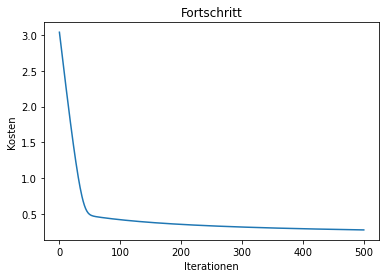

In [20]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

#### Plot Data and Decision Boundary 

**Task:**

Now plot the decision boundary (a straight line in this case) together with the data.         

In [21]:
# Insert your code to plot below
theta_hist[-1]

array([-3.63555652,  0.91304089,  1.2219175 ])

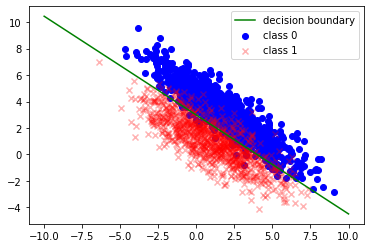

In [22]:
# Insert your code to plot below

x1 = np.linspace(-10, 10, 5)
x2 = ( 0.0 - theta_hist[-1][0] - theta_hist[-1][1] * x1 ) / theta_hist[-1][2]
plt.plot(x1, x2, 'g', label="decision boundary")
plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="class 1", alpha=0.3)
plt.legend()

#### Accuracy

The logistic hypothesis outputs a value in the interval $]0,1[$. We want to map this value to one specific class i.e. $0$ or $1$, so we apply a threshold known as the decision boundary: If the predicted value is < 0.5, the class is 0, otherwise it is 1.

**Task:**

1. Calculate the accuracy of your final classifier. The accuracy is the proportion of the correctly classified data.
2. Why will the accuracy never reach 100% using this model and this data set?

In [24]:
# Solution 1

print(y)
predictions = logistic_hypothesis(theta_hist[-1])(X) < 0.5
print(predictions)
correctly_classified = predictions == y
print(correctly_classified)
sum_correct = correctly_classified.sum()
print(sum_correct)
proportion = sum_correct / len(X)
print(proportion)

# or just:
float(((logistic_hypothesis(theta_hist[-1])(X)<0.5) == y).sum())/ len(X)

[1. 1. 1. ... 0. 0. 0.]
[ True False False ...  True  True  True]
[ True False False ... False False False]
150
0.075


0.075

**Solution 2:**

Because in some regions of the data input there is quite-high probability for both inputs (overlapping classes).
So, even with a more complex classifier (not restricted to hyperplane decision boundaries) we get no better results.

### Regularization

**Task:**
    
Extend your implementation with a regularization term $\lambda$ by adding it as argument to the functions `mean_cross_entropy_costs`, `compute_new_theta` and `gradient_descent`.


# Bias variance tradeoff

In [28]:
import hashlib
def round_and_hash(value, precision=4, dtype=np.float32):
    """ 
    Function to round and hash a scalar or numpy array of scalars.
    Used to compare results with true solutions without spoiling the solution.
    """
    rounded = np.array([value], dtype=dtype).round(decimals=precision)
    hashed = hashlib.md5(rounded).hexdigest()
    return hashed

In this exercise, the target function $t(x)$ is the sin curve. Our task is to approximate the target using linear regression, i.e. a straight line. To do so we need training samples from the model. A single training sample is a pair of points on the sin curve, generated as follows:
* $p(x)$ is the uniform distribution in the interval $[0,2\pi]$
* Two x-values $x^{(1)}$ and $x^{(2)}$ are drawn from $p(x)$
* The y-value is the target of x without any additional noise so $y^{(i)}= t(x^{(i)}) = sin(x^{(i)})$

![plot1.png](attachment:plot1.png)

Using these two points, we'll try two different hypotheses to approximate the sin curve:
1. $$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$$
    A straight line through the two points. The parameters $\theta_0$ and $\theta_1$ correspond to the y-intercept and slope of a [linear function](https://www.mathsisfun.com/algebra/linear-equations.html).
2. $$\mathcal H_2: h_2(x) = w$$
A constant, i.e. a line parallel to the x-axis. Our choice of $w$ is the mean of the y-values of the two sampled data points.

![plot2.png](attachment:plot2.png)

To judge which of the hypothesis does a better job of modeling the target, we'll generate more training data and learn parameters for the hypotheses. Then we'll evaluate the hypotheses according to the *our of sample error*, *bias* and *variance*.

**Task:**

- Do the following 10.000 times:
 - Draw two random examples $x^{(1)}$ and $x^{(2)}$ from $p(x)$ and calculate the corresponding $y$s to get $\mathcal D = \{(x^{(1)},x^{(2)}), (y^{(1)},y^{(2)})\}$ *(training data)* 
 - Using your *training data* calculate the parameters $\theta_0, \theta_1$ for $\mathcal H_1$ and the parameter $w$ for $\mathcal H_2(x)$
 - Numerically calculate the out of sample error $E_{out}$ for $\mathcal H_1(x)$ and $\mathcal H_2(x)$ for 100 data points uniformly distributed in the interval of $[0, 2\pi]$ (*validation data*) 
 
 
- Now calculate the average $\theta_0, \theta_1$ and $w$ of all 10.000 experiments.
- Also calculate the average "out of sample error" $E_{out}$ for both hypothesis sets $\mathcal H_1$ and $\mathcal H_2$.
- Use the above to calculate the *bias$^2$* and the *variance*.
- Plot the target function $sin(x)$ together with both average hypotheses $\tilde h_1(x)$ and $\tilde h_2(x)$ using the average $\theta_0, \theta_1$ and $w$
- Considering your results, which hypothesis seems to better model the target function?

Practically this explanation is all you need to solve the exercise. You are free to complete it without any further guiding or by proceeding with this notebook.

### Data Generation

**Task:**

Implement the function to draw two random training examples $(x^{(i)},y^{(i)})$ with:

- $x^{(i)} \in Uniform(0,2\pi)$
- $i \in \{1,2\}$
- $y^{(i)} = sin(x^{(i)})$

In [31]:
def train_data():
    x = np.random.uniform(0, 2*np.pi, 2)
    y = np.sin(x)
    return x,y

In [32]:
x_train, y_train  = train_data() 
print(x_train, y_train)

[2.78356713 2.42137537] [0.35042565 0.65954801]


### Hypothesis

For our training data we will now model two different hypothesis sets:

$$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$$

and 

$$\mathcal H_2: h_2(x) = w$$

**Task:**

Implement the functions to calculate the parameters $\theta_0, \theta_1$ for $h_1$ and $w$ for $h_2$ using the two drawn examples. 

For later purpose (passing functions as argument) it is important that both functions accept the same amount of parameters and also return the same amount. Therefore we also pass $x$ to `get_w`, although we do not need it. And for the same reason `get_thetas` should return a list of two values instead of two separate values.

In [34]:
def get_thetas(x, y):
    theta_1 = (y[1] - y[0]) / (x[1] - x[0])
    theta_0 = y[0] - x[0] * theta_1
    return [theta_0, theta_1]

def get_w(x, y):
    return y.mean()

In [35]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
print(thetas[0], thetas[1])
print(w)

2.7261364194556696 -0.8534770912640829
0.5049868275166641


In [36]:
# If your implementation is correct, these tests should not throw an exception

x_train_temp = np.array([0,1])
y_train_temp = np.array([np.sin(x_i) for x_i in x_train_temp])
thetas_test = get_thetas(x_train_temp, y_train_temp)
w_test = get_w(x_train_temp, y_train_temp)

np.testing.assert_almost_equal(thetas_test[0], 0.0)
np.testing.assert_almost_equal(thetas_test[1], 0.8414709848078965)
np.testing.assert_almost_equal(w_test, 0.42073549240394825)

**Task:**

Implement the hypothesis $h_1(x)$ and $h_2(x)$. Your function should return a function.

In [38]:
def get_hypothesis_1(thetas):
    return lambda x: thetas[0] + thetas[1] * x

def get_hypothesis_2(w):
    print(w.shape)
    return lambda x: w * np.ones((len(x)))

In [39]:
# we want to compute numerically the expectation w.r.t. x
x_grid = np.linspace(0, 2*np.pi, 100)
y_grid = np.sin(x_grid)

**Task:**

Write the function to plot:
- the two examples $(x^{(1)},y^{(2)})$ and $(x^{(2)},y^{(2)})$
- the true target function $sin(x)$ in the interval $[0, 2 \pi]$.
- the hypothesis $h_1(x)$ in the interval $[0, 2 \pi]$
- the hypothesis $h_2(x)$ in the interval $[0, 2 \pi]$
    

In [43]:
def plot_true_target_function_x_y_h1_h2(x, y, hypothesis1, hypothesis2):
    
    x_ = np.linspace(0, 2*np.pi, 100)
    y_ = np.sin(x_)
    
    plt.plot(x_, y_, 'b-', label="target sin(x)")
    plt.scatter(x,y,color='r')
    
    plt.plot(x_, hypothesis1(x_), 'g-', label="$h_1(x)$")
    plt.plot(x_, hypothesis2(x_), 'y-', label="$h_2(x)$")
    
    plt.legend()

()


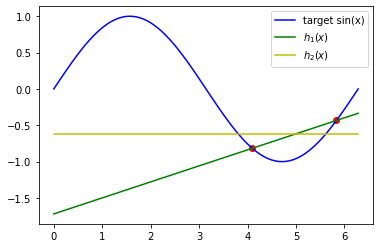

In [44]:
x_train, y_train  = train_data() 
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
plot_true_target_function_x_y_h1_h2(x_train, y_train, get_hypothesis_1(thetas), get_hypothesis_2(w))

### Out of Sample Error

The _out of sample error_ $E_{out}(h)$ is the expected error on new unseen data.

$$
E_{out}(h) = \mathbb E_{x,y}[loss(h(x), y)]  = \int_{\mathcal X \times \mathcal Y} loss(h(x), y) p(x,y) dx dy
$$


In our example we don't need to take the expectation w.r.t. $y$ because we have have no noise:

$$
E_{out}(h) = \mathbb E_{x}[loss(h(x), t(x))]  = \int_{\mathcal X } loss(h(x), t(x)) p(x) dx
$$

Here we will compute the _out of sample error_ $E_{out}(h)$ numerically.      
     
We already have discretized the $x$-axis (`x_grid`) for $p(x)\neq 0$.      
So to compute the expectation we just need to average over `x_grid` (remember $p(x)$ is uniform).      

$$
E_{out}(h) = \mathbb E_{x}[loss(h(x),t(x))] \approx \frac{1}{m} \sum_{j=1}^{m} loss(h(x^{(j)}), y^{(j)}) 
$$

with
- $m$: number of elements in `x_grid`
- $x^{(j)}$ is the $j$-element of `x_grid`

**Task:**

Implement the function to numerically calculate the out of sample error $E_{out}$ with the mean squared error as loss function.

In [45]:
def out_of_sample_error(y_preds, y):
    return ((y_preds - y) ** 2).mean()

### Repeat

**Task:**

Now instead of drawing two examples (one training data set), draw 
now 10.000 times different training sets with two examples.    
Calculate $E_{out}$ for the different $h_1$ and $h_2$ numerically.

For each run, keep track of the following parameters and return them at the end of the function:
- $\{x^{(1)},x^{(2)}\}$
- $\{y^{(1)},y^{(2)}\}$
- $\theta_0$
- $\theta_1$
- $w$
- $E_{out}$


In [47]:
def run_experiment(m, x_grid, y_grid):
    xs = np.ndarray((m,2))
    ys = np.ndarray((m,2))
    t0s = np.ndarray(m)
    t1s = np.ndarray(m)
    ws = np.ndarray(m)
    e_out_h1s = np.ndarray(m)
    e_out_h2s = np.ndarray(m)
    
    for i in range(m):
        x, y = train_data()
        thetas = get_thetas(x,y)
        w = get_w(x, y)
        
        xs[i] = x
        ys[i] = y
        t0s[i] = thetas[0]
        t1s[i] = thetas[1]
        ws[i] = w
        
        h1 = get_hypothesis_1(thetas)
        h2 = get_hypothesis_2(w)
        
        e_out_h1s[i] = out_of_sample_error(h1(x_grid), y_grid)
        e_out_h2s[i] = out_of_sample_error(h2(x_grid), y_grid)
        
    return xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s

In [48]:
x_grid.shape

(100,)

In [49]:
xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s = run_experiment(
    10000, x_grid, y_grid)

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

In [50]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)
print(thetas_avg)

()
[0.7982443673080488, -0.2526993414435743]


In [51]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)
print(thetas_avg)

()
[0.7982443673080488, -0.2526993414435743]


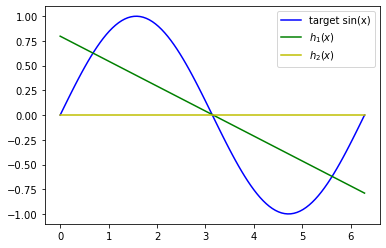

In [52]:
plot_true_target_function_x_y_h1_h2([], [], h1_avg, h2_avg)

In [53]:
expectation_Eout_1 = e_out_h1s.mean()
print ("expectation of E_out of model 1:", expectation_Eout_1)

expectation of E_out of model 1: 1.865853306091627


In [54]:
expectation_Eout_2 = e_out_h2s.mean()
print ("expectation of E_out of model 2:", expectation_Eout_2)

expectation of E_out of model 2: 0.7369551990529377


### Bias

The bias for the mean-squared error is:
$$
bias^2 = \mathbb E_{x,y} \left[(\tilde h(x) - y)^2\right]
$$


The expectation w.r.t. $y$ vanishes if we have no noise:

$$
bias^2 = \mathbb E_x \left[(\tilde h(x) - t(x))^2\right]
$$


with:

- the average hypothesis $\tilde h(x)$

**Task:**

Implement the function to calculate the expecation of the bias numerically.

In [55]:
def bias(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

In [56]:
bias_1 = bias(y_grid,  h1_avg(x_grid))
print ("Bias of model 1:", bias_1)

Bias of model 1: 0.2091673543920447


In [57]:
bias_2 = bias(y_grid,  h2_avg(x_grid))
print ("Bias of model 2:", bias_2)

Bias of model 2: 0.49501401250150695


### Variance

Variance for the mean-squared-error:

$$
variance = \mathbb E_x \left[ \mathbb E_D \left[\left(h^D(x) - \tilde h(x)\right)^2 \right] \right]
$$

with:

- the average hypothesis $\tilde h(x)$
- the learned hypothesis $h^D(x)$ for training data set $D$.

**Task:**

Implement the function to calculate the variances for each of the 10.000 experiments and return them as list or array.

Now we benefit from our implementation of `get_w`, `get_thetas`, respectively `get_hypothesis1`,`get_hypothesis2`, which accept and return the same amount of parameters, so we can write a generalized function.


In [58]:
def variances(hypothesis_func, param_func, xs, ys, x_val, y_preds):
    # y_preds is the prediction of the average hypothesis
    
    # variance
    deltas_m = np.ndarray(len(xs))
    
    for i in range(len(xs)): # loop over different training data 
        params = param_func(xs[i], ys[i])
        h_temp = hypothesis_func(params)
        y_pred_temp = h_temp(x_val)
        deltas_m[i] = ((y_pred_temp - y_preds)**2).mean()
    
    return deltas_m

In [59]:
vars_1 = variances(get_hypothesis_1, 
                 get_thetas, 
                 xs, ys, 
                 x_grid, 
                 h1_avg(x_grid))
var_1_avg = vars_1.mean()
print(var_1_avg)

1.6566859516995829


In [60]:
vars_2 = variances(get_hypothesis_2, 
                 get_w, 
                 xs, ys, 
                 x_grid, 
                 h2_avg(x_grid))
var_2_avg = vars_2.mean()
print(var_2_avg)

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

In [61]:
print("model 1: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, var_1_avg))
print("model 2: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_2, bias_2, var_2_avg))

model 1: E_out ≈ bias^2 + variance:  1.865853 ≈ 0.209167 + 1.656686
model 2: E_out ≈ bias^2 + variance:  0.736955 ≈ 0.495014 + 0.241941


# Decision trees

In [2]:
import numpy as np
import pandas as pd

#from sklearn.preprocessing import Imputer # in newer versions: 
from sklearn.impute import SimpleImputer as Imputer

from sklearn import tree

#old: from sklearn.externals.six import StringIO
from six import StringIO

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

## Teaching Content

### Decision Trees for Classification

In a decision tree the data is split at each node according to a decision rule. This corresponds to nested *if-then-else*-rules. In the *if*-part of such a rule are decision is made based on a feature of the data record. 

We will use the scikit learn implementation. For this implementation the features must be binary or have (at least) ordinal characteristic. If a feature is e.g. nominal with many values, it must be converted to a set of binary (one-hot-coded) features.


The splitting rules in the scikit learn implementation are binary and are based on a threshold, e.g.
  - _if $x_6 <= 2.14$ then_ left subbranch, *else* right subbranch.         
  - binary features must be coded as 0/1, so the rule becomes: if $x_2 <= 0.5$ _then_ left subbranch, _else_ right subbranch. 


<!--The structure of the tree will be determined by data (see below) and a training procedure.-->

In the leaves of the tree the (class) predictions are made. There are two possibilities for such an inference: 
   - hard assignment: Predict for the data records which end up on a leaf by the majority class of the training data that end up on that leaf.          
   - soft assignment: Assign probabilities according to the distribution of the classes in respect to the training data which end up on that leaf.

As an example of a decision tree we will learn the following tree from the titanic data set: 

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/master/media/klaus/exercise-decision-trees-a-tree.png" width="1024" alt="internet connection needed">

A full explanation of the tree will be given later. Here just look at the decision rules (first line of the inner nodes) and at the last line of the leafs. In each leaf you see an array (values) with counts of the different targets for the train data: [number_died, number_survivors] .

### Learning 

Finding a tree that splits the training data optimal is [np-hard](https://en.wikipedia.org/wiki/NP-hardness). Therefore often a *greedy*-strategy is used:

To build up a decision tree the algorithm starts at the root of the tree. The feature and the threshold 
that splits the training data best (with respect to the classes) are chosen. In an iterative way the whole tree is build up by such splitting rules. 

There are different criteria for measuring the "separation (split) quality". The most important ones are:

- Gini Impurity 
- Information Gain 

In this tutorial we concentrate on the information gain.

### Information Gain as Splitting Criterion

The entropy with respect to the target class variable $y$ of a training data set $\mathcal D$ is defined as:

$$
 H(y, \mathcal D) = - \sum_{y \in \mathcal Y} p(y|\mathcal D) \log_2 p(y|\mathcal D)
$$
with the domain of the target values $\mathcal Y = \{t_1, t_2,... \}$.


The probabilities are estimated by 
$$
  p(y=t_i, \mathcal D) = |\mathcal D^{(y=t_i)}| /|\mathcal D| 
$$    


with the number of training data $|\mathcal D|$  and the number of training data $|\mathcal D^{(y=t_i)}|$ with target label $t_i$: 


On a node a (binary) split on a feature $x_k$ is made by the split rule $x_k \leq v$. 
As result there are two data sets $\mathcal D_0$ and $\mathcal D_1$ for the left resp. the right branch.

The feature $x_k$ and the split value $v$ are chosen that they maximize the 'reduction of the entropy' measured by the information gain $I$:
$$
  I(y; x_k) = H(y, \mathcal D) - H(y|x_k) = H(y, \mathcal D) - \sum_{j=0}^1 p_jH(y, \mathcal D_j) =
  H(y, \mathcal D) + \sum_{j=0}^1  \sum_{y \in \mathcal Y} \frac{|\mathcal D_j|}{|\mathcal D|} p(y|\mathcal D_j) \log_2 p(y|\mathcal D_j)
$$
Note that $p_{j=0}$  is the estimated probability that a random data record of $\mathcal D$ has feature value $x_k \leq v$ which can be estimated by ${|\mathcal D_0|}/{|\mathcal D|}$ (analog for $j=1$).

$p(y=t_i|\mathcal D_0)$ can also be estimated by the fraction of the counts ${|\mathcal D_0^{(y=t_i)}|}/{|\mathcal D_0|}$. 
So the information gain can be computed just with counts:


$$
  I(y; x_k) = -
   \sum_{y \in \mathcal Y} \frac{|\mathcal D^{(y=t_i)}|}{|\mathcal D|}  \log_2 \frac{|\mathcal D^{(y=t_i)}|}{|\mathcal D|} + \sum_{j=0}^1  \sum_{y \in \mathcal Y} \frac{|\mathcal D_j^{(y=t_i)}|}{|\mathcal D|}  \log_2 \frac{|\mathcal D_j^{(y=t_i)}|}{|\mathcal D_j|}
$$


<!--$|\mathcal D_0|$ respectivly $|\mathcal D_1|$ is the number of elements in the splitted data sets.-->
 

### Overfitting

Deep decision trees generalize often poorly. The following remedies reduce overfitting: 

- Limitation of the maximal depth of the tree. 
- Pruning with an validation set either during training (pre-pruning) or after training (post-pruning).
- Dimensionality reduction (reducing the number of features before training)


Also often combining decision trees to an ensemble (decision forests) is used against overfitting.  

### Loading the Data

First we read in the _titanic data set_ with _pandas_

**Task:**

1. Complete the code to load the dataset as [_pandas_](http://pandas.pydata.org/) [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) object.
2. Either download the [_titanic-train.csv_](https://gitlab.com/deep.TEACHING/educational-materials/raw/master/datasets/titanic-train.csv) or alternatively read the url directly into a pandas DataFrame.

In [3]:
### Exercise: Load the csv file as pandas DataFrame
url = 'https://gitlab.com/deep.TEACHING/educational-materials/raw/master/notebooks/data/titanic-train.csv'
train_df = pd.read_csv(url)

In [ ]:
### Not an exercise, just execute the cell

print(train_df.ndim)
print(train_df.shape)

In [ ]:
### Not an exercise, just execute the cell

### To view the dataset as pretty table (when using jupyter) 
train_df

In [4]:
### To return the data as numpy array:
train_df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [5]:
train_df[['PassengerId', 'Survived', 'Sex']].values

array([[1, 0, 'male'],
       [2, 1, 'female'],
       [3, 1, 'female'],
       ...,
       [889, 0, 'female'],
       [890, 1, 'male'],
       [891, 0, 'male']], dtype=object)

### Data Preprocessing

#### Feature Transformation

Scikit's learn decision trees can handle only numeric data. So we must convert the nominal `Sex` feature. 

**Task:**

Convert the nominal feature into a binary feature. Convert 'male' to 0 and 'female' to 1.

In [6]:
train_df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [7]:
train_df["Sex"] = train_df["Sex"].apply(lambda sex: 1 if sex == 'female' else 0)
# or
#df.Sex[df["Sex"]=='female'] = 1
#df.Sex[df["Sex"]=='male'] = 0

In [8]:
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
y = None # Exercise: Extract target feature "Survived" as 1D array
x = None # Exercise: Extract the features we want to use for training as 2D array

In [9]:
y = targets = labels = train_df["Survived"].values

columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
x = train_df[list(columns)].values
x

array([[ 7.25  ,  3.    ,  0.    , 22.    ,  1.    ],
       [71.2833,  1.    ,  1.    , 38.    ,  1.    ],
       [ 7.925 ,  3.    ,  1.    , 26.    ,  0.    ],
       ...,
       [23.45  ,  3.    ,  1.    ,     nan,  1.    ],
       [30.    ,  1.    ,  0.    , 26.    ,  0.    ],
       [ 7.75  ,  3.    ,  0.    , 32.    ,  0.    ]])

#### Missing Values

There are missing values (`NaN`) for some examples in the _"Age"_ column. Use the scikit learn `Imputer` class to replace them by the mean of the columns.

In [10]:
print("-----------First 5 with nan BEFORE----------")
nanMask = np.argwhere(np.isnan(x))
print(x[nanMask[0:5,0]])

-----------First 5 with nan BEFORE----------
[[ 8.4583  3.      0.         nan  0.    ]
 [13.      2.      0.         nan  0.    ]
 [ 7.225   3.      1.         nan  0.    ]
 [ 7.225   3.      0.         nan  0.    ]
 [ 7.8792  3.      1.         nan  0.    ]]


In [11]:
print("-----------First 5 with nan AFTER----------")
print(x[nanMask[0:5,0]])

-----------First 5 with nan AFTER----------
[[ 8.4583  3.      0.         nan  0.    ]
 [13.      2.      0.         nan  0.    ]
 [ 7.225   3.      1.         nan  0.    ]
 [ 7.225   3.      0.         nan  0.    ]
 [ 7.8792  3.      1.         nan  0.    ]]


In [12]:
print("-----------First 5 with nan BEFORE----------")
nanMask = np.argwhere(np.isnan(x))
print(x[nanMask[0:5,0]])

imp = Imputer()#missing_values=nan, strategy='mean') #, axis=0)
x = imp.fit_transform(x)

print("-----------First 5 with nan AFTER----------")
print(x[nanMask[0:5,0]])

-----------First 5 with nan BEFORE----------
[[ 8.4583  3.      0.         nan  0.    ]
 [13.      2.      0.         nan  0.    ]
 [ 7.225   3.      1.         nan  0.    ]
 [ 7.225   3.      0.         nan  0.    ]
 [ 7.8792  3.      1.         nan  0.    ]]
-----------First 5 with nan AFTER----------
[[ 8.4583      3.          0.         29.69911765  0.        ]
 [13.          2.          0.         29.69911765  0.        ]
 [ 7.225       3.          1.         29.69911765  0.        ]
 [ 7.225       3.          0.         29.69911765  0.        ]
 [ 7.8792      3.          1.         29.69911765  0.        ]]


### Training and Visualization

In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x, y)

`clf` is an instance of a trained decision tree classifier.

The decision tree can be visualized (after training). For this we must write an graphviz dot-File  

In [14]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=columns, class_names=['died', 'survived'] 
   , filled = True))
graph

NameError: name 'Source' is not defined

In [15]:
### To open in seperate window and save it
graph.format = 'png'
graph.render('dtree_render',view=True)

NameError: name 'graph' is not defined

According to the decision tree the main criterion (root node) for survival is the sex of the passenger (_if your implementation is correct so far_). In the left subtree are the male passengers (sex = 0), in the right subtree the female (sex=1). 

In the leafs the class information is given by a `value` array. Here the second value is the number of survivors in the leaves.

For example the leftmost leaf represents passengers that are male (sex=0) with fare<=26.2687 and age<=13.5. 13 of such boys survived and 2 of them died.

The entropy $- \sum p_i \log_2 (p_i)$ is displayed also at each node (splitting criterion).


### Prediction / Validation

To make predictions with scikit learn, we must convert the data in
the same way as we did it with the training data. Then we could use the method:    

    clf.predict(validation_data)
    
The depth of the decision tree is a hyperparameter. So the depth should be determined with the help of a 
validation set or by cross validation.

**Task:**

1. Manually split your training data in 75% for training and 25% for validation
2. Repeat the training process several times for different tree depths (define a new model every time)
3. Use `clf.predict(validation_data)` to predict your validation data
3. Manually calculate the accuracy for the validation set each time
 - Accuracy is defined as $\frac{\text{number of correct predictions}}{\text{number of all predictions}}$
4. From your results: Which seems to be the best tree depths?

In [16]:
length = int(len(x) * 0.75)
print(length)
x_train = x[:length]
x_val = x[length:]
y_train = y[:length]
y_val = y[length:]

668


In [17]:
for depth in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(x_train, y_train)
    preds = clf.predict(x_val)
    acc = (preds - y_val) 
    acc = [1 if i == -1 else i for i in acc]
    acc = 1 - np.sum(acc) / len(y_val)
    print('depth: ', depth, ' acc: ', acc)

depth:  1  acc:  0.789237668161435
depth:  2  acc:  0.789237668161435
depth:  3  acc:  0.8385650224215246
depth:  4  acc:  0.8340807174887892
depth:  5  acc:  0.8340807174887892
depth:  6  acc:  0.8340807174887892
depth:  7  acc:  0.8340807174887892
depth:  8  acc:  0.8161434977578476
depth:  9  acc:  0.8295964125560538
depth:  10  acc:  0.8295964125560538
depth:  11  acc:  0.8385650224215246
depth:  12  acc:  0.8340807174887892
depth:  13  acc:  0.820627802690583
depth:  14  acc:  0.8116591928251121
depth:  15  acc:  0.8161434977578476
depth:  16  acc:  0.8161434977578476
depth:  17  acc:  0.7982062780269058
depth:  18  acc:  0.8026905829596412
depth:  19  acc:  0.7937219730941704


### Crossvalidation

Now with a dataset with less than 900 data examples (we have 891), chances to unluckily divide training and validation split seem pretty high. Also "wasting" 25% for validation on such a small data set is also not the ideal solution.

**Task:**

Now do not manually divide your data and do not manually compute the accuracy. Instead use the function `sklearn.model_selection.cross_val_score` to search the best tree depth. Use 10-fold crossvalidation.

In [18]:
depths = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=10, n_jobs=4, scoring="accuracy")
    depths.append((i, scores.mean()))
    
for d in depths: print('depth: ', d[0], ' acc: ', d[1])

depth:  1  acc:  0.786729088639201
depth:  2  acc:  0.7688764044943821
depth:  3  acc:  0.8170536828963796
depth:  4  acc:  0.8081897627965045
depth:  5  acc:  0.8205368289637953
depth:  6  acc:  0.8216354556803995
depth:  7  acc:  0.8160549313358303
depth:  8  acc:  0.8127091136079901
depth:  9  acc:  0.8171535580524345
depth:  10  acc:  0.8093133583021223
depth:  11  acc:  0.8125967540574282
depth:  12  acc:  0.8014232209737827
depth:  13  acc:  0.8081772784019975
depth:  14  acc:  0.8002996254681648
depth:  15  acc:  0.8059300873907616
depth:  16  acc:  0.7969288389513107
depth:  17  acc:  0.7868414481897628
depth:  18  acc:  0.785692883895131
depth:  19  acc:  0.7868164794007491


### Gridsearch

This already works pretty well to determine one hyperparameter. But imagine you had several hyperparameters. Since the computation (even with 10 fold crossvalidation) is very fast for decision trees, it is no problem at all to try out every possible combination of hyperparameters. For each hyperparameter you would have to implement another for-loop. Should be no problem. But for convenience, you should know scikit-learn also has a built-in function for that.

**Task:**

Use `sklearn.model_selection.GridSearchCV` to do a grid search for the best hyperparameters. In addition to `max_depth` parameter between _[1_, _20]_, add the `criterion` as another hyper parameter with the possible values _"entropy"_ and _"gini"_.

Further useful functions after the grid search: `clf.best_score_` and `clf.best_params_`

In [19]:
parameters = {'max_depth':range(1,20), 'criterion':['entropy','gini']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8227590511860174 {'criterion': 'entropy', 'max_depth': 5}


### Splitting Criterion Entropy / Information Gain

As you might have noticed, packages like _scikit learn_ can be very comfortable, since they do most of the work for you as long as you provide the data in the right format. Though a good advice is, that you should know what happens inside of such a black box.

**Task 1:**

Recompute the root node entropy. On Pen & paper or with just some lines of code here using basic mathematical operations.

In [21]:
nb_survived = y.sum()
p_survived = float(y.sum())/len(y)
p_not_survived = 1. - p_survived
entropy_before_split  = - p_survived * np.log2(p_survived) - p_not_survived * np.log2(p_not_survived)
entropy_before_split

0.9607079018756469

**Task 2:**

Compute the information gain of the first split node (root node). Use the shown entropy values and number of data records (samples). Again on Pen & paper or with just some lines of code here using basic mathematical operations.

In [22]:
entropy_left = -(468/577 * np.log2(468/577) + 109/577 * np.log2(109/577))
entropy_right = -(81/314 * np.log2(81/314) + 233/314 * np.log2(233/314))
print("entropy left node:", entropy_left)
print("entropy right node:", entropy_right)
weighted_entropy_after_split = 577./(577+314) * entropy_left + 314./(577+314) * entropy_right
information_gain_split_root_node = entropy_before_split - weighted_entropy_after_split 
print("Information gain of the root node split:", information_gain_split_root_node)

entropy left node: 0.6991817891208407
entropy right node: 0.8236550739295191
Information gain of the root node split: 0.2176601066606142


**Task 3:**

Compute the information gain of the following split table:

<table>
    <thead>
    <tr>
        <th>
        </th>
        <th>
            class 0
        </th>
        <th>
            class 1
        </th>
    </tr>
    </thead>
    <tr>
        <td>
            feature $\le$ v
        </td>
        <td>
            2
        </td>
        <td>
            13
        </td>
    </tr>
    <tr>
        <td>
            feature $>$ v
        </td>
        <td>
            359
        </td>
        <td>
            41
        </td>
    </tr>
</table>
 

The numbers are the corresponding data records, e.g. there are 13 data records with target class 1 and feature $\le$ v. 

Write a python function that computes the information gain.The data is given by a python array:

Like always, you are free to write as many helper functions as you want.

In [ ]:
data = np.array([[2.,13.],[359., 41.]])

### My Implementation

In [ ]:
EBefore = -54/415*np.log2(54/415)-361/415*np.log2(361/415)

entropy_feature_smaller_v = -(13/15*np.log2(13/15)+2/15*np.log2(2/15))
entropy_feature_bigger_v = -(41/400*np.log2(41/400)+359/400*np.log2(359/400))

print(entropy_feature_smaller_v)
print(entropy_feature_bigger_v)

condP = 15./(400+15) * entropy_feature_smaller_v + 400./(400+15) * entropy_feature_bigger_v

infoGain = EBefore-condP
print(end)

In [ ]:
### Solution
### Very explicit and special:

def entropy(p_):
    p = p_.copy()
    p[p != 0] = - p[p != 0] * np.log2(p[p != 0] )
    return p.sum()

def information_gain(data):
    entropy_feature_smaller_v = entropy(data[0]/data[0].sum())
    entropy_feature_bigger_v = entropy(data[1]/data[1].sum())
    #print(entropy_feature_smaller_v)
    #print(entropy_feature_bigger_v)
    entropy_before_split = entropy(data.sum(axis=0)/data.sum(axis=0).sum())
    weights = data.sum(axis=1)/data.sum()
    weighted_entropy_after_split = weights[0] * entropy_feature_smaller_v + weights[1] * entropy_feature_bigger_v
    return entropy_before_split - weighted_entropy_after_split

In [ ]:
np.testing.assert_almost_equal(information_gain(data), 0.07765787804281093)
print("Information Gain:", information_gain(data))

More general and reusable solution based on a probability table:

In [23]:
def p_log_p(p_):
    p = p_.copy()
    p[p != 0] = - p[p != 0] * np.log2(p[p != 0] )
    return p

def entropy(p):
    assert (p>=0.).all()
    assert np.allclose(1., p.sum(), atol=1e-08)
    return p_log_p(p).sum()

def conditional_entropy(p, axis=0):
    if axis == 1:
        p = p.T
    p_y_given_x = p / p.sum(axis=0)
    c = p_log_p(p_y_given_x) 
    p_x = p.sum(axis=0)/p.sum()
    s = c * p_x
    return s.sum()
 
def information_gain(p0, axis = 0):
    p = p0.copy()
    if axis == 1:
        p = p.T
    p_ = p.sum(axis=1)
    return entropy(p_) - conditional_entropy(p)

p = data / data.sum()
p = p.T
p_y = p.sum(axis=1)

print("Entropy H(Y) = ", entropy(p_y))
print("Conditional-Entropy H(Y|X) = ",  conditional_entropy(p))
print("Information Gain I(Y; X) = H(Y) - H(Y|X) =", information_gain(p))

NameError: name 'data' is not defined